### About

This notebook runs the Kernel Density Estimate (KDE) model using the LSST-like dataset of PanSTARRS, GALEX, and AllWISE. It uses all the features listed below (including redshift), and derives colors based off of adjacent columns. It filters down to classes that have at least 6 samples total. We assume that any less will be insufficient for gaining patterns. 

Scroll down and see the resulting plots from this analysis. Overall, this model does not perform as well as K-trees, although Ia Pec and Ib/c appear to have relatively good ROC curves. Meaning, that for either we could capture about 40% of the class without alerting on false positives. The probability versus accuracy plots are worse than K-Tree results though, since they are essentially empty in between 10 and 90%. 

In [1]:
mag_cols = ['GALEXAIS_FUV', 'GALEXAIS_NUV', 
         'GALEXAIS_FUV.b', 'GALEXAIS_e_FUV.b', 'GALEXAIS_NUV.b',
        'GALEXAIS_e_NUV.b', 'GALEXAIS_FUV.a', 'GALEXAIS_e_FUV.a', 'GALEXAIS_NUV.a',
        'GALEXAIS_e_NUV.a', 'GALEXAIS_FUV.4', 'GALEXAIS_e_FUV.4', 'GALEXAIS_NUV.4', 
        'GALEXAIS_e_NUV.4', 'GALEXAIS_FUV.6', 'GALEXAIS_e_FUV.6', 'GALEXAIS_NUV.6', 
        'GALEXAIS_e_NUV.6',
        'AllWISE_W1mag', 'AllWISE_e_W1mag', 'AllWISE_W2mag', 'AllWISE_e_W2mag',
           'AllWISE_W3mag', 'AllWISE_e_W3mag', 'AllWISE_W4mag', 'AllWISE_e_W4mag', 
        'PS1_gmag' ,
        'PS1_gmagStd', 'PS1_b_gmag' ,'PS1_B_gmag',
        'PS1_gKmag' ,
        'PS1_rmag',
        'PS1_rmagStd', 'PS1_b_rmag' ,'PS1_B_rmag',
        'PS1_rKmag' ,
        'PS1_imag' ,
        'PS1_imagStd', 'PS1_b_imag', 'PS1_B_imag',
        'PS1_iKmag' ,
        'PS1_zmag' ,
        'PS1_zmagStd', 'PS1_b_zmag', 'PS1_B_zmag',
        'PS1_zKmag' ,
        'PS1_ymag',
        'PS1_ymagStd', 'PS1_b_ymag', 'PS1_B_ymag',
        'PS1_yKmag' 
]

flux_cols = ['GALEXAIS_Fflux', 'GALEXAIS_Nflux']

external_cols = ['AllWISE_Jmag', 'AllWISE_Hmag', 'AllWISE_Kmag']

source_size = ['GALEXAIS_Fima',
'GALEXAIS_Nima',
'GALEXAIS_Fr',
'GALEXAIS_Nr']

quality_photometry= ['AllWISE_snr1',
'AllWISE_chi2W1',
'AllWISE_snr2',
'AllWISE_chi2W2',
'AllWISE_snr3',
'AllWISE_chi2W3',
'AllWISE_snr4',
'AllWISE_chi2W4',
'AllWISE_chi2']
extinction_rates= ['GALEXAIS_E_B-V_',
'MWExt_FUV_PS' ,
'MWExt_NUV_PS' ,
'MWExt_FUV_Y',
'MWExt_NUV_Y',
'MWExt_u' ,
'MWExt_g' ,
'MWExt_r' ,
'MWExt_i' ,
'MWExt_z' ,
'MWExt_J' ,
'MWExt_H' ,
'MWExt_Ks' ,
'MWExt_W1' ,
'MWExt_W2' ,
'MWExt_W3' ,
'MWExt_W4' ]




cols = mag_cols + flux_cols + external_cols + source_size + quality_photometry + extinction_rates


Data Filters
------------------
num_runs : 1
test_on_train : False
folds : 3
data_split : 0.3
top_classes : None
one_all : None
subsample : None
transform_features : True
transform_labels : True
incl_redshift : True
min_class_size : 6
pca : None
naive : False

Features
------------------
GALEXAIS_FUV, GALEXAIS_NUV, GALEXAIS_FUV.b, GALEXAIS_NUV.b, GALEXAIS_FUV.a, GALEXAIS_NUV.a, GALEXAIS_FUV.4, GALEXAIS_NUV.4, GALEXAIS_FUV.6, GALEXAIS_NUV.6, AllWISE_W1mag, AllWISE_W2mag, AllWISE_W3mag, AllWISE_W4mag, PS1_gmag, PS1_gmagStd, PS1_b_gmag, PS1_B_gmag, PS1_gKmag, PS1_rmag, PS1_rmagStd, PS1_b_rmag, PS1_B_rmag, PS1_rKmag, PS1_imag, PS1_imagStd, PS1_b_imag, PS1_B_imag, PS1_iKmag, PS1_zmag, PS1_zmagStd, PS1_b_zmag, PS1_B_zmag, PS1_zKmag, PS1_ymag, PS1_ymagStd, PS1_b_ymag, PS1_B_ymag, PS1_yKmag, GALEXAIS_Fflux, GALEXAIS_Nflux, AllWISE_Jmag, AllWISE_Hmag, AllWISE_Kmag, GALEXAIS_Fima, GALEXAIS_Nima, GALEXAIS_Fr, GALEXAIS_Nr, AllWISE_snr1, AllWISE_chi2W1, AllWISE_snr2, AllWISE_chi2W2, AllWISE_snr3, 

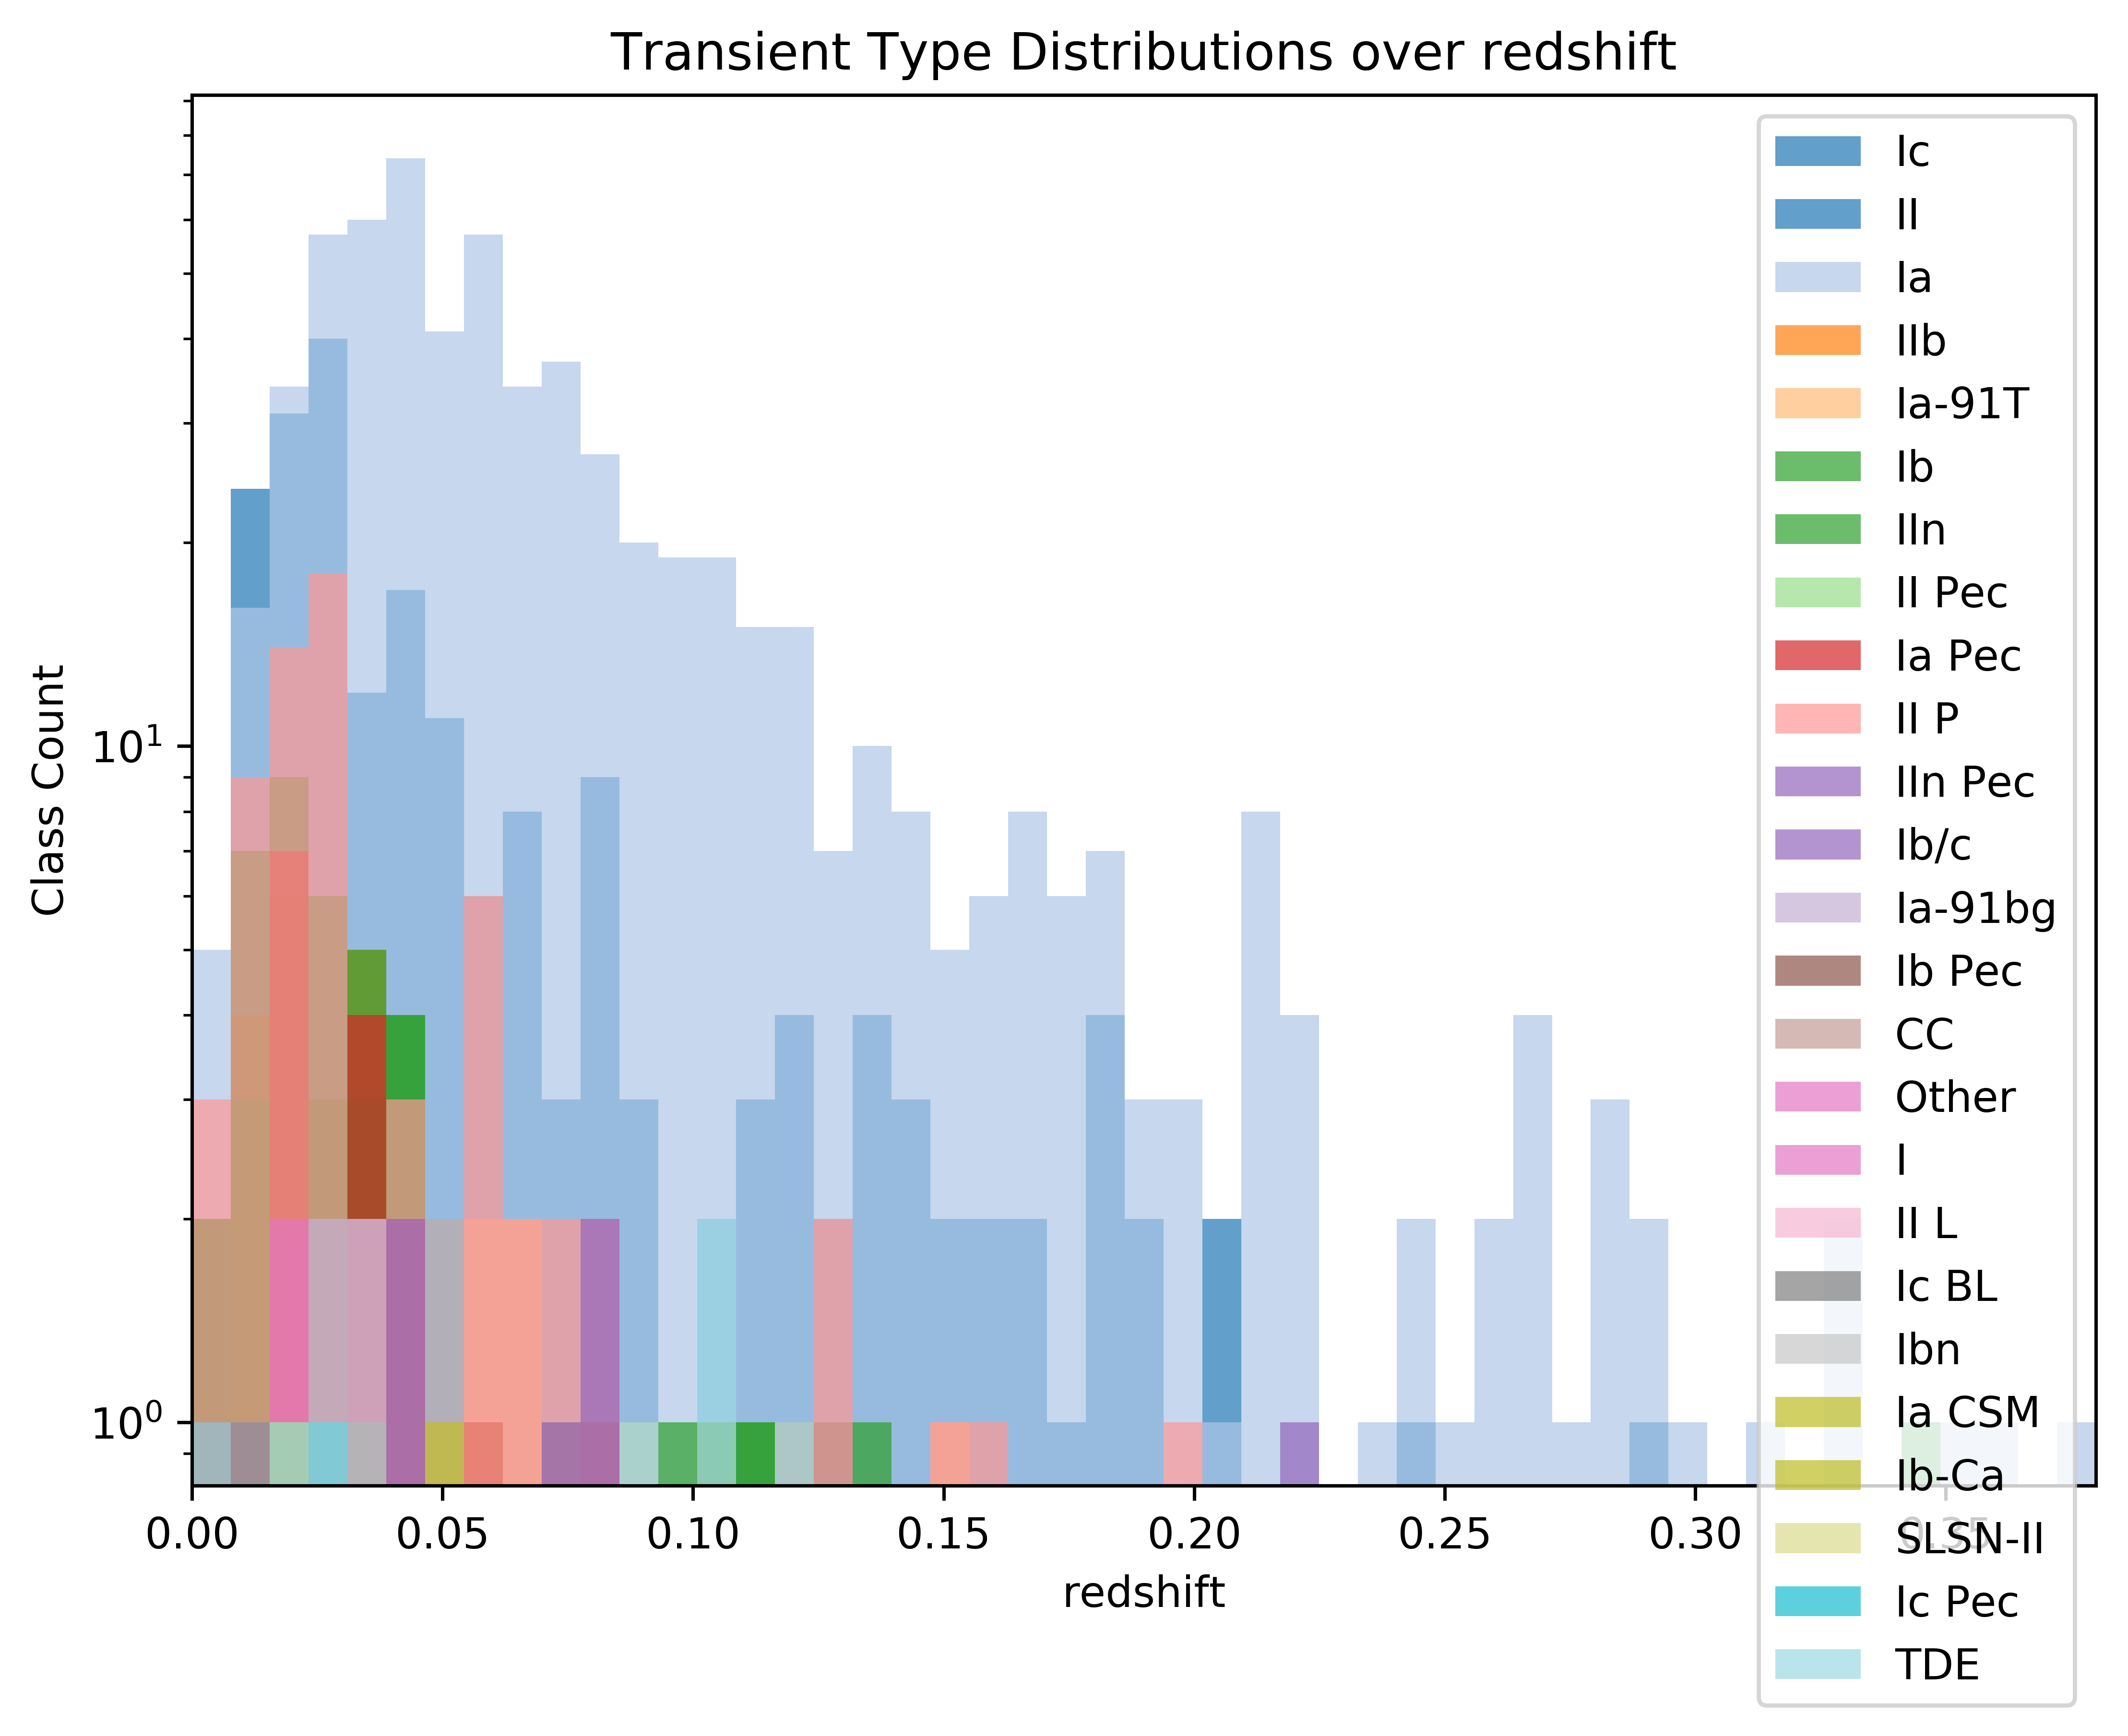


Counts per Class
------------------ 
Ia : 632
II : 201
II P : 69
IIn : 40
Ib : 29
Ia Pec : 20
Ia-91T : 19
IIb : 18
Ic : 15
Ib/c : 11
TDE : 7

Total: 1061


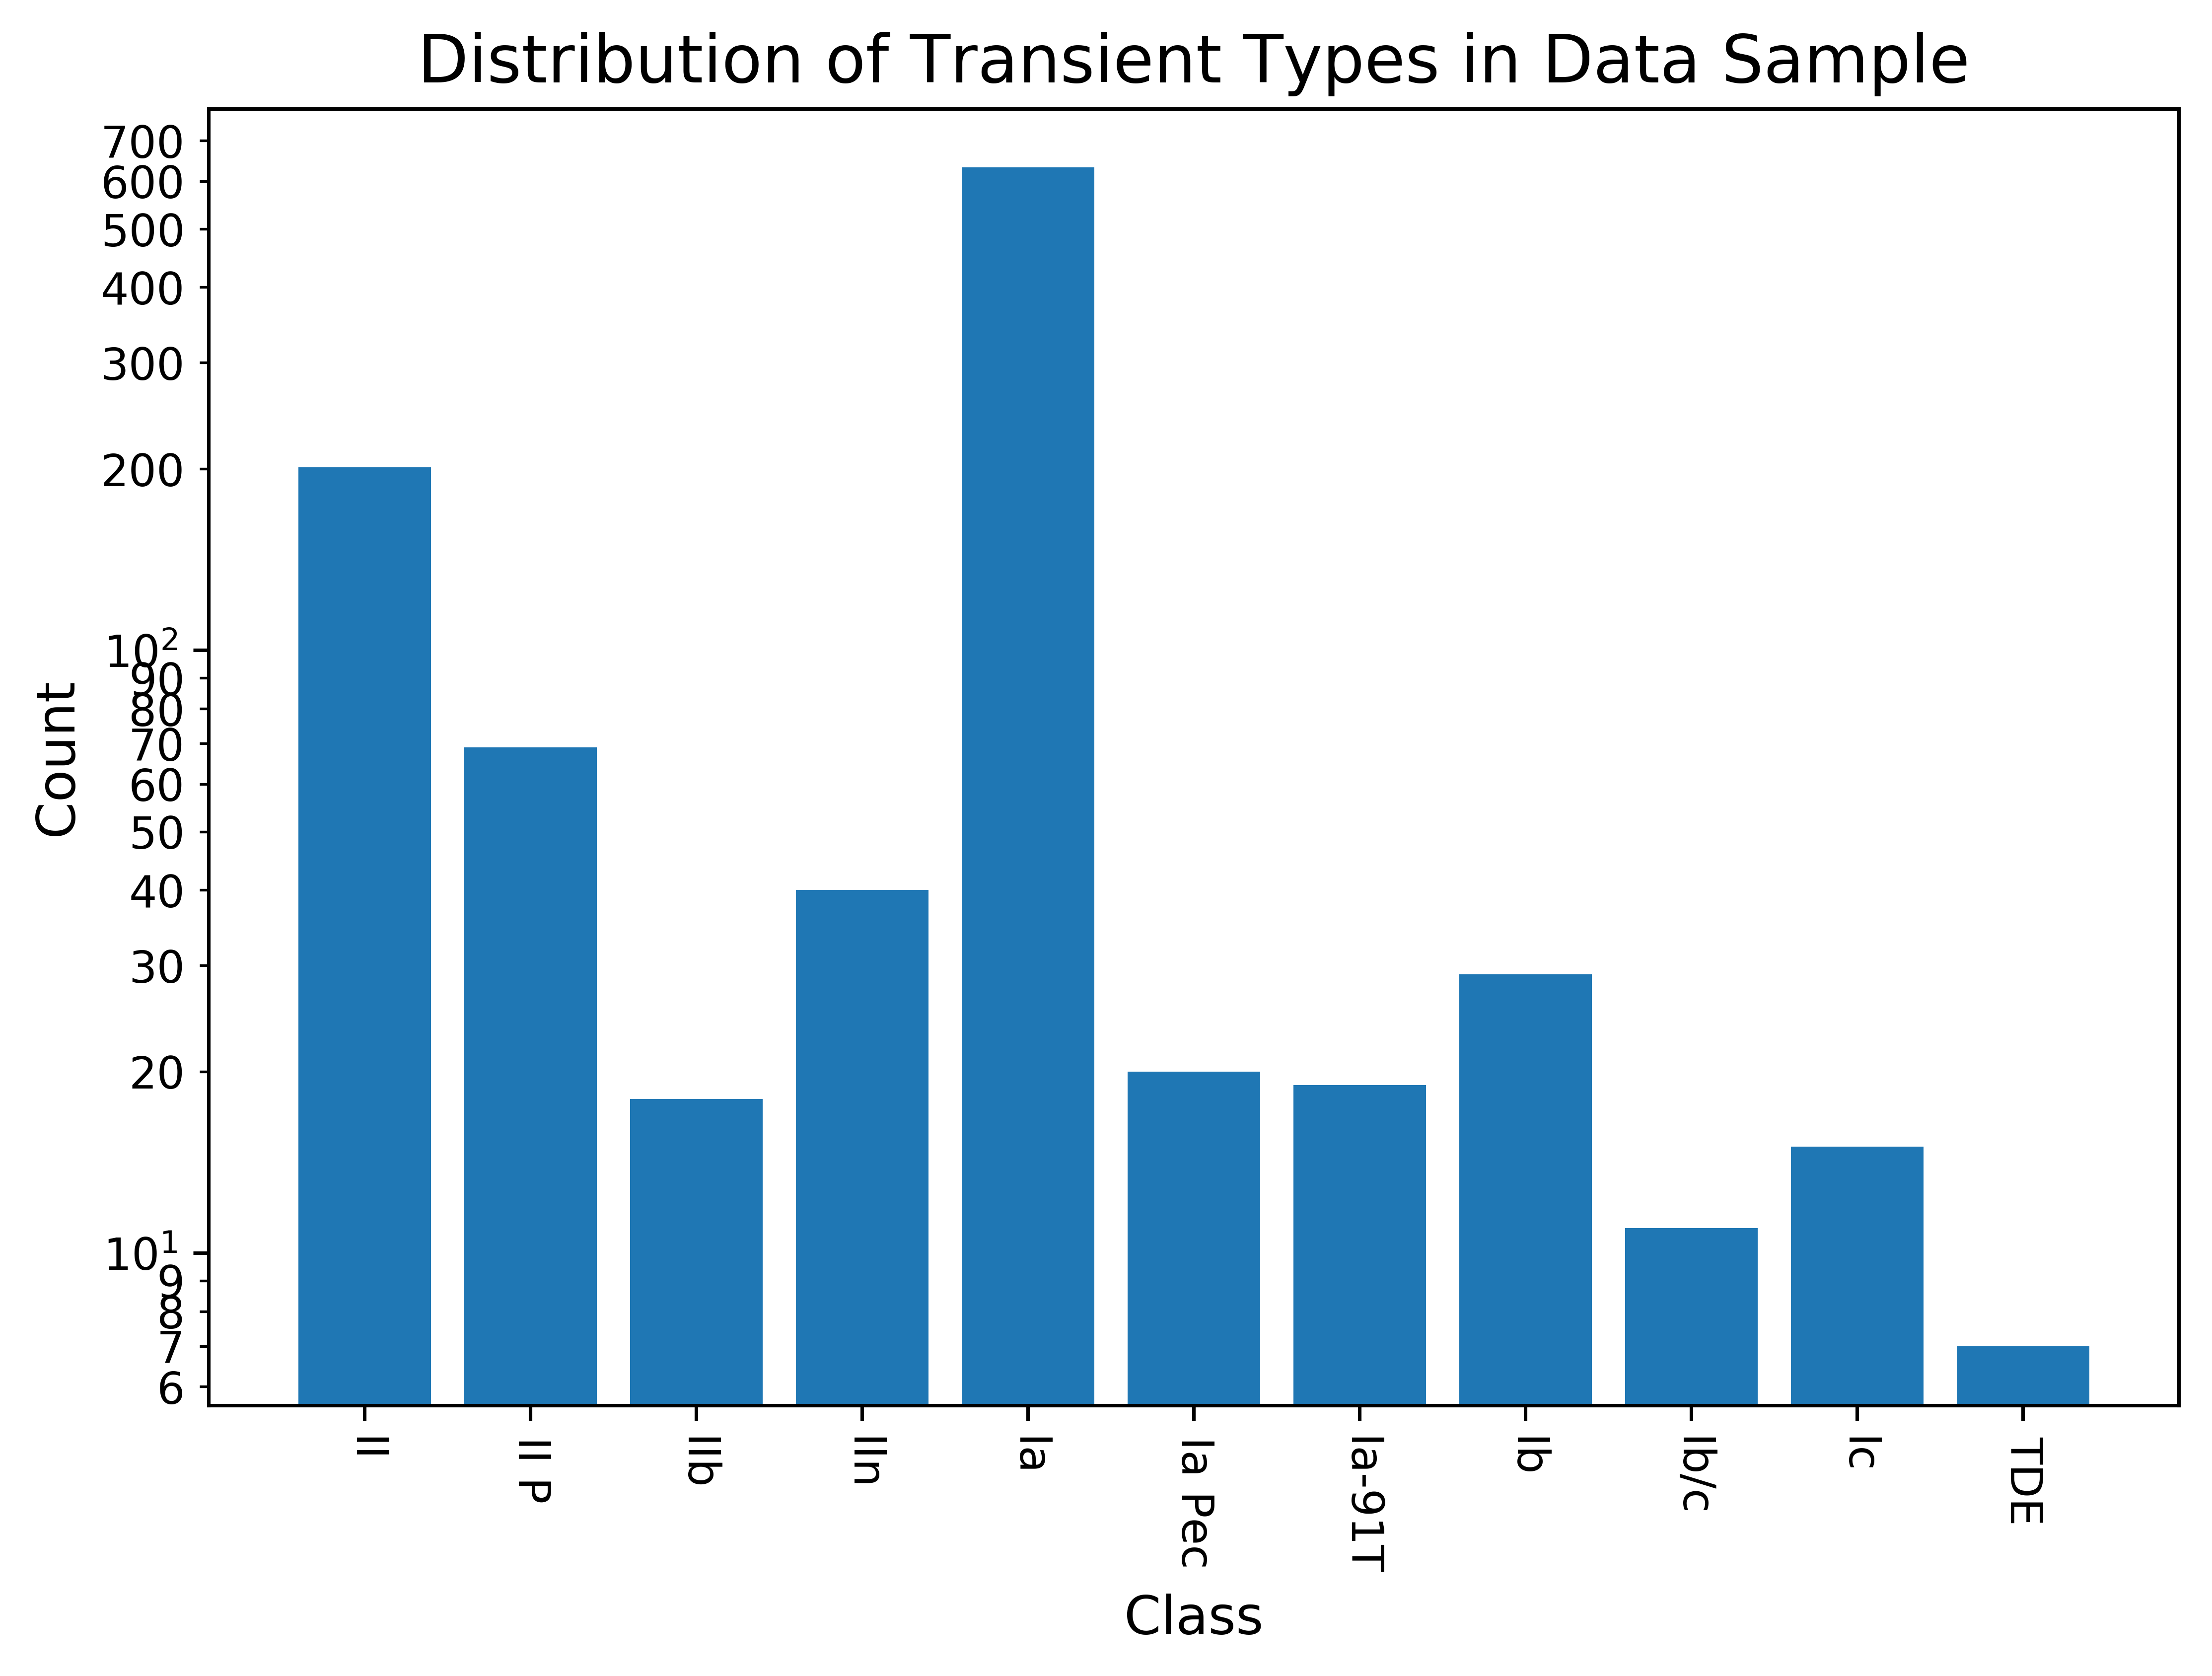

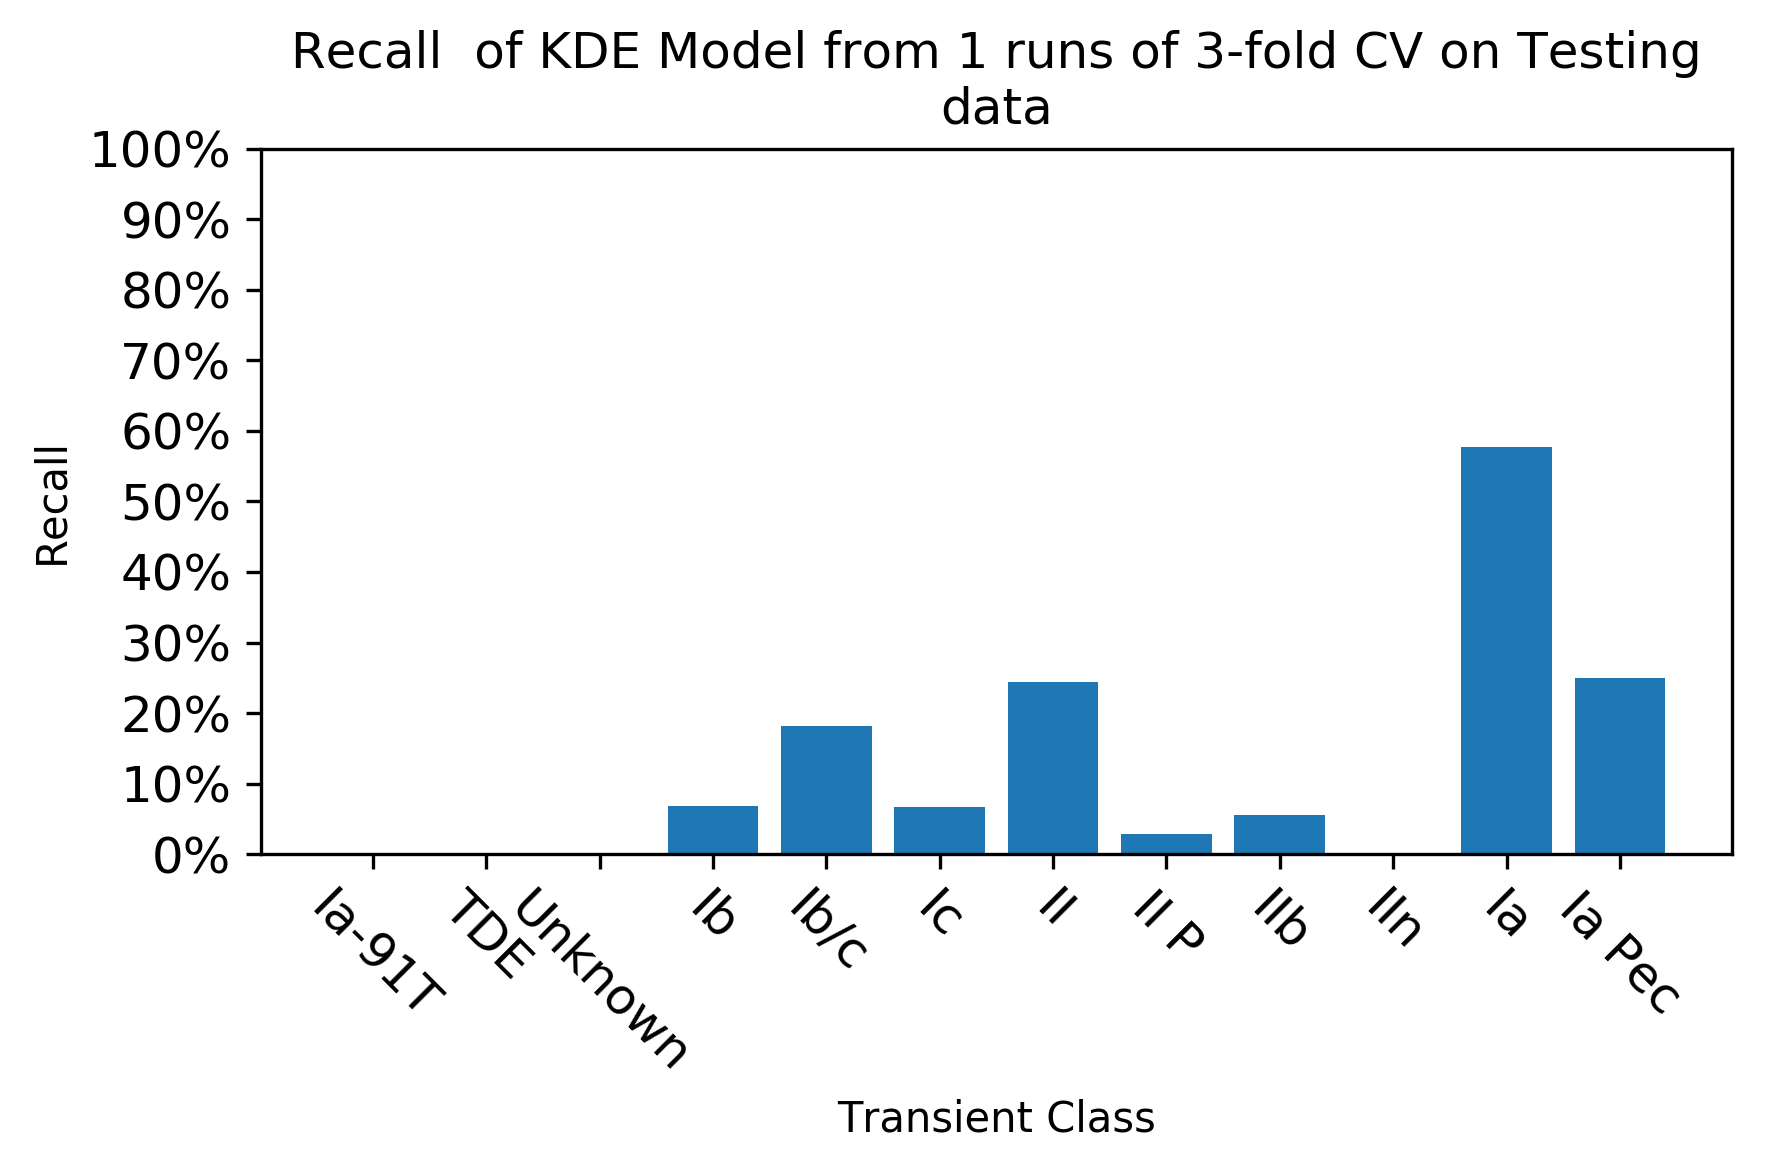

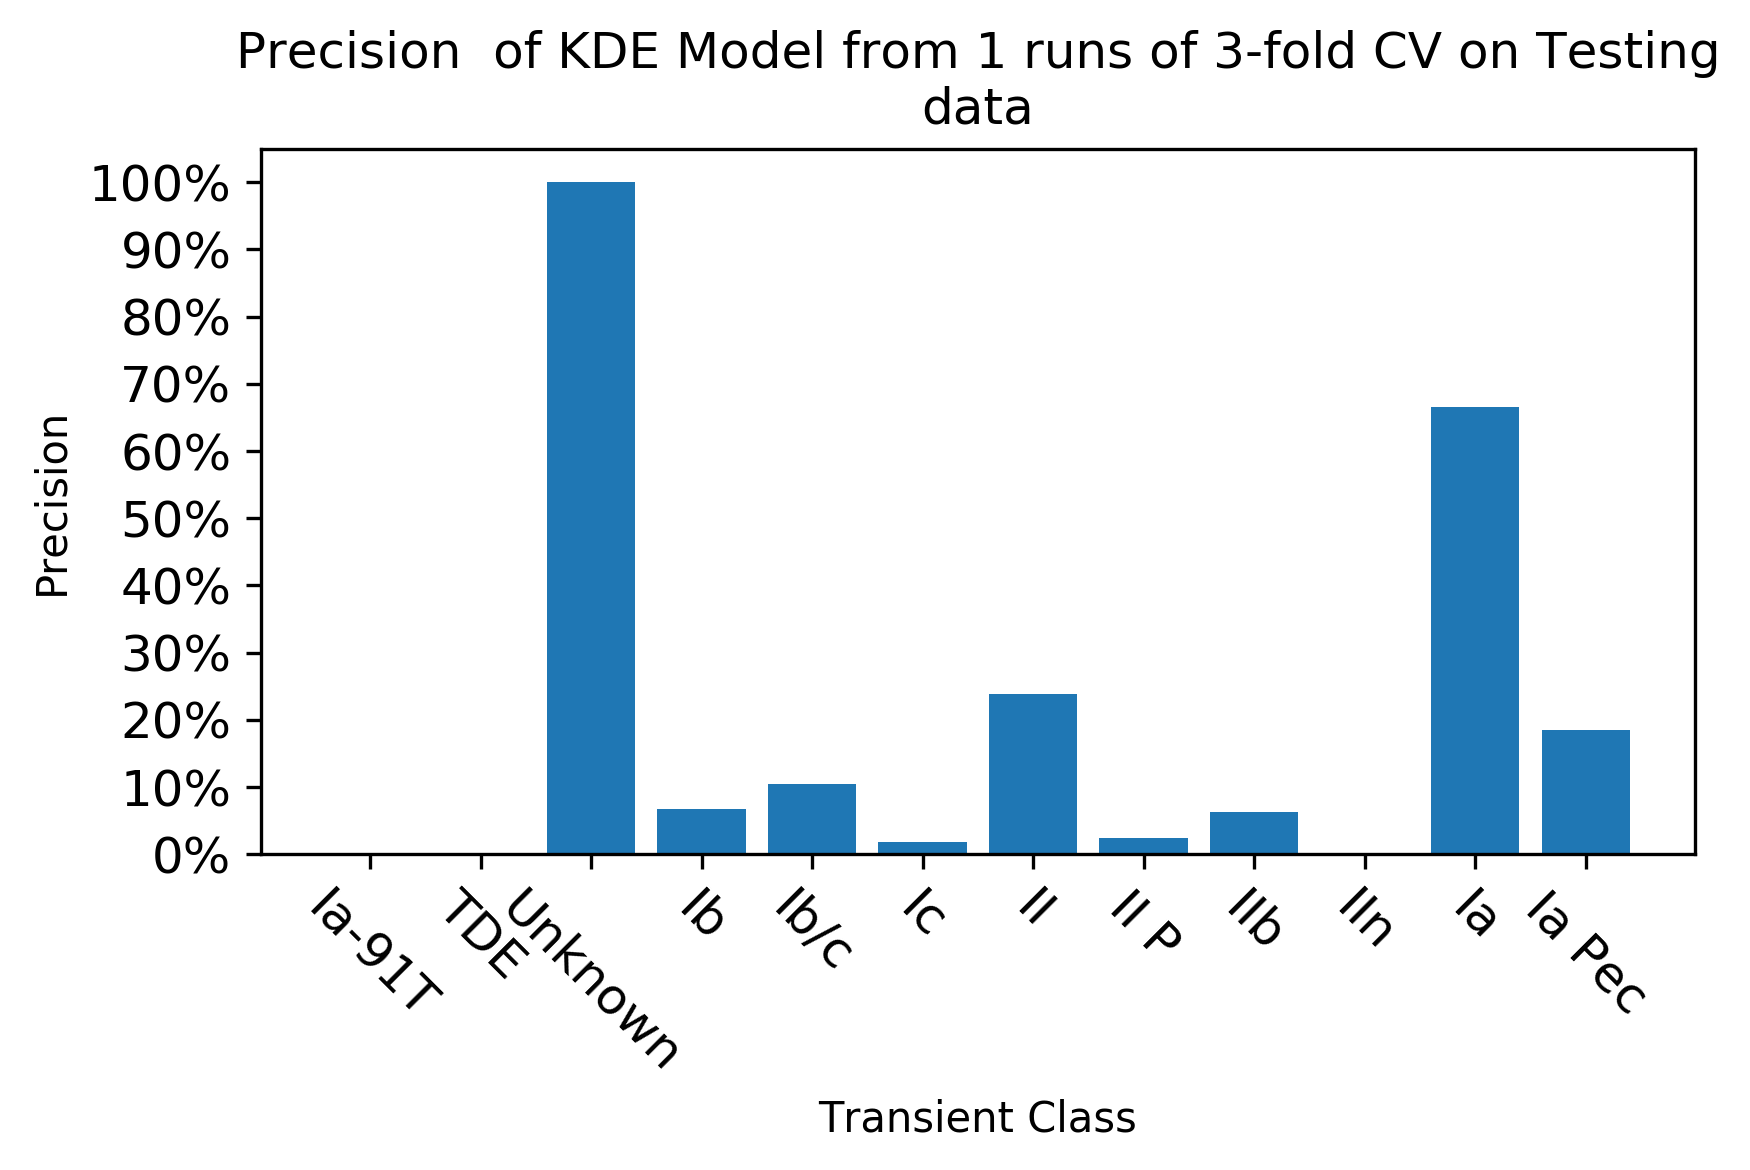

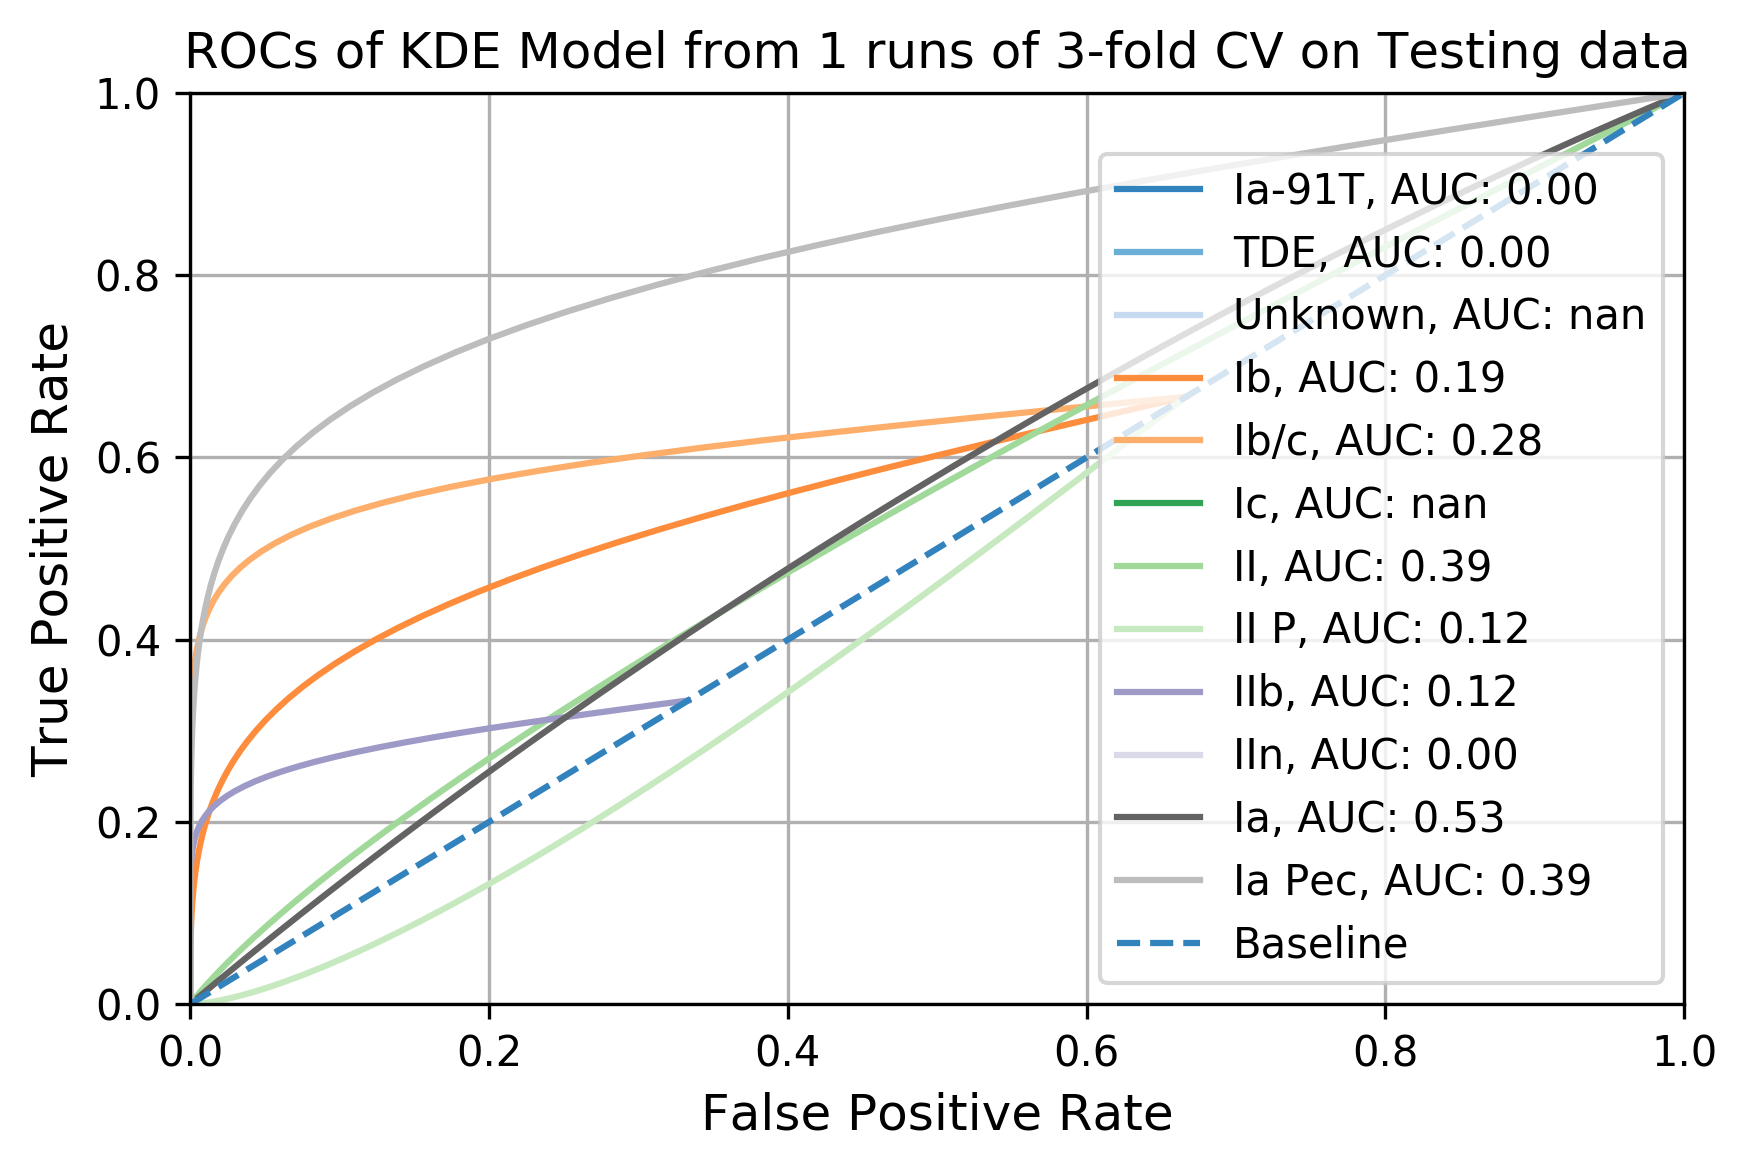

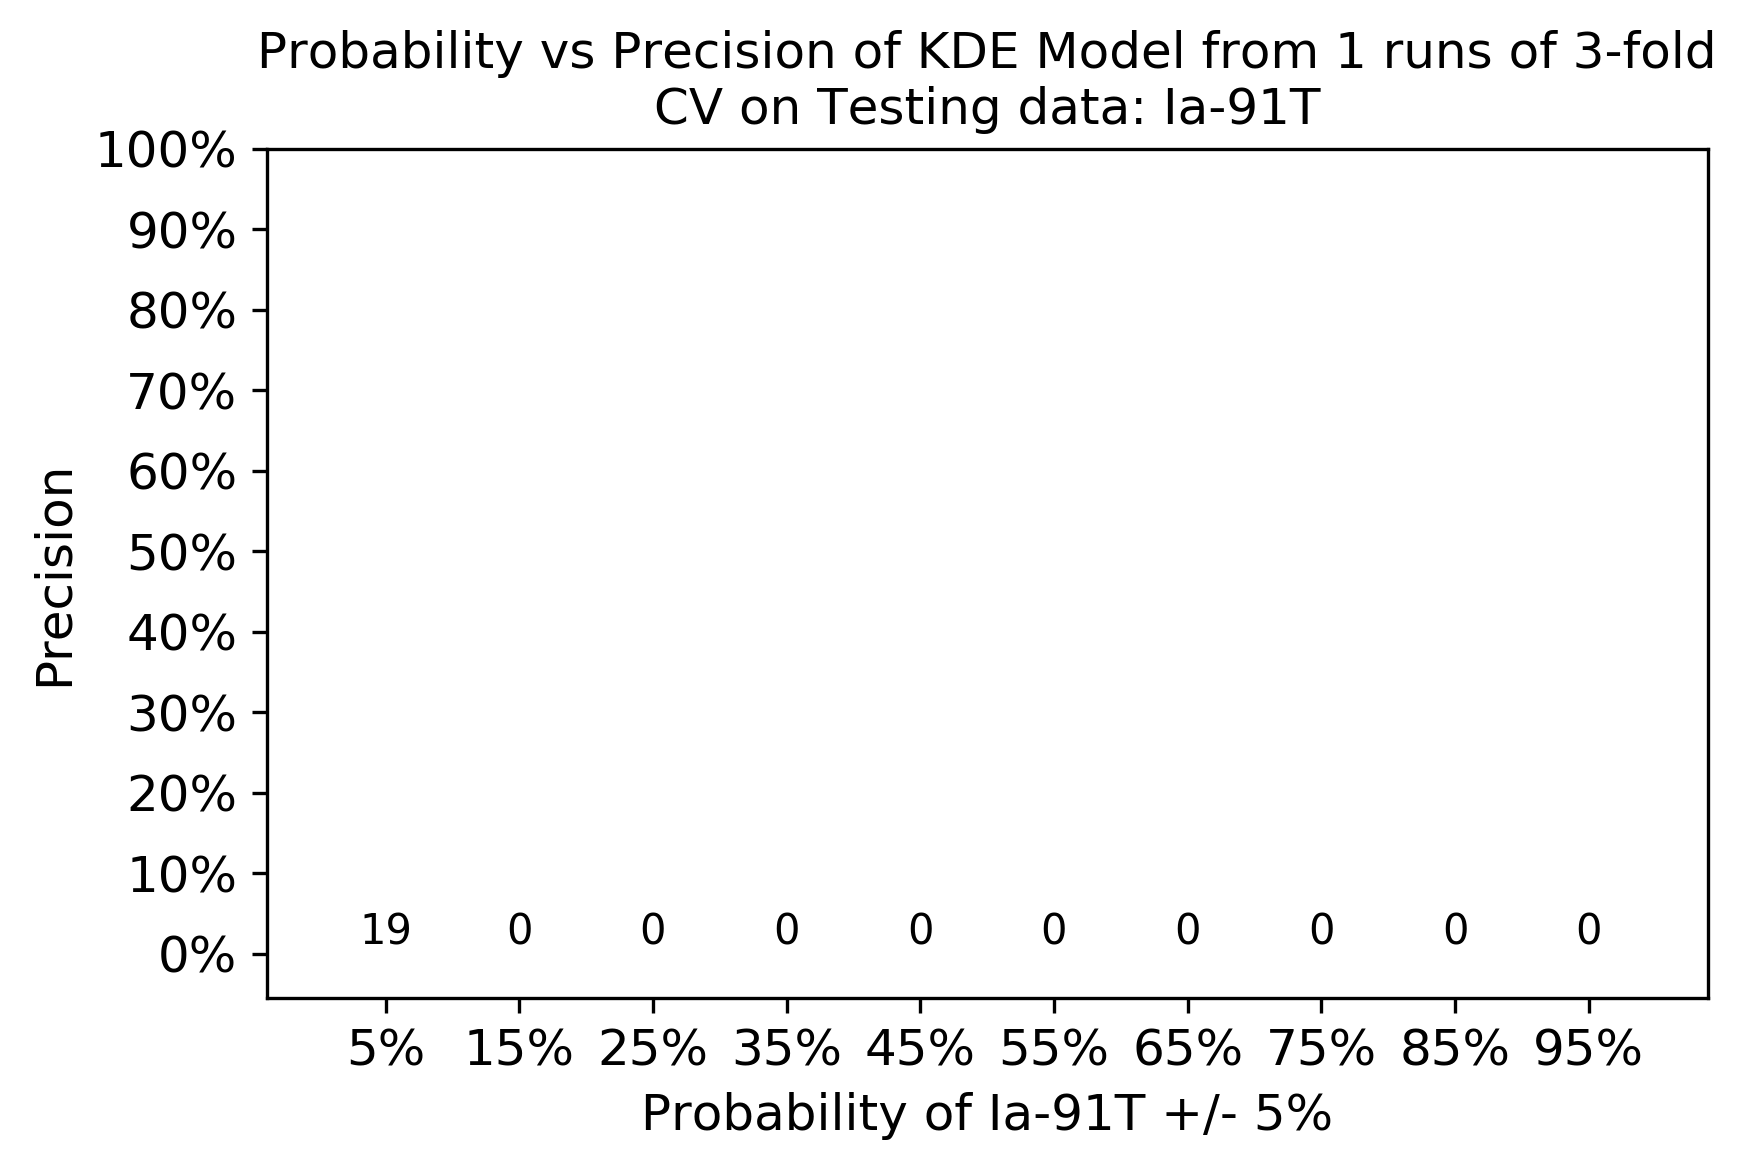

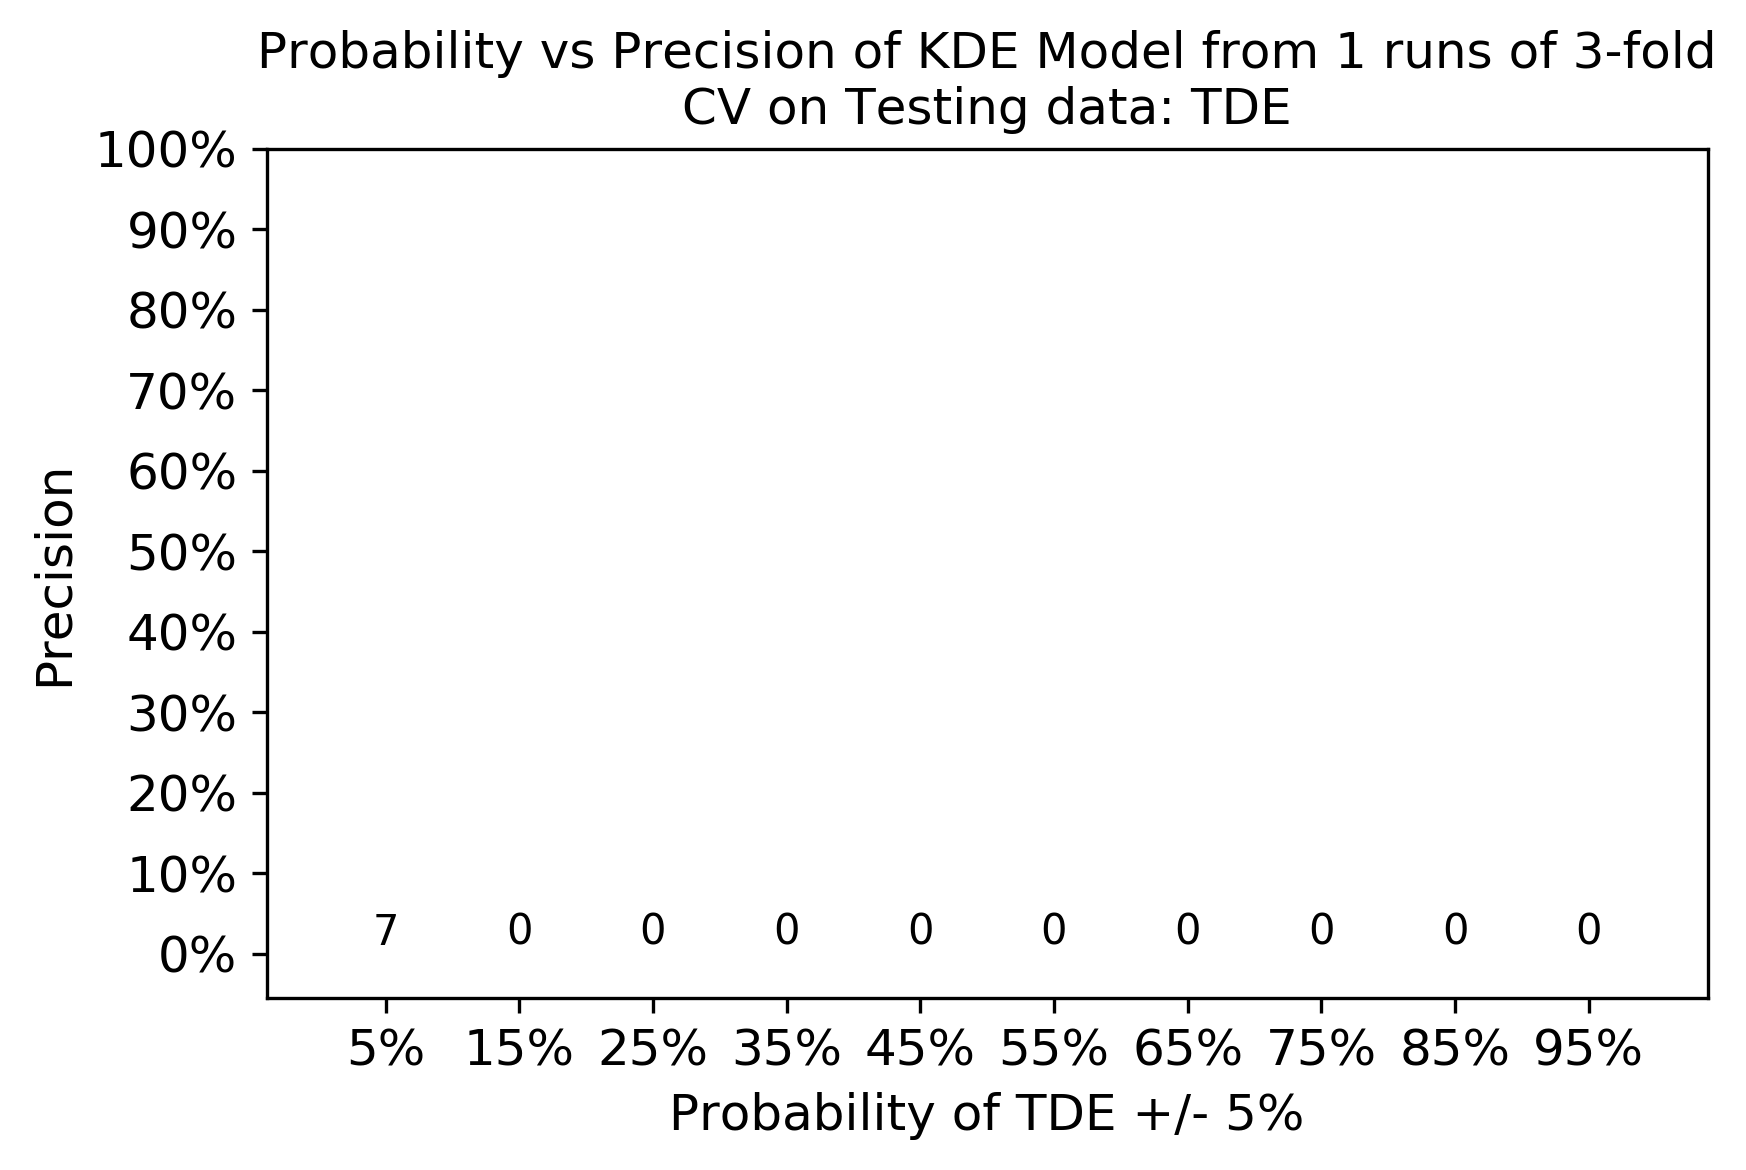

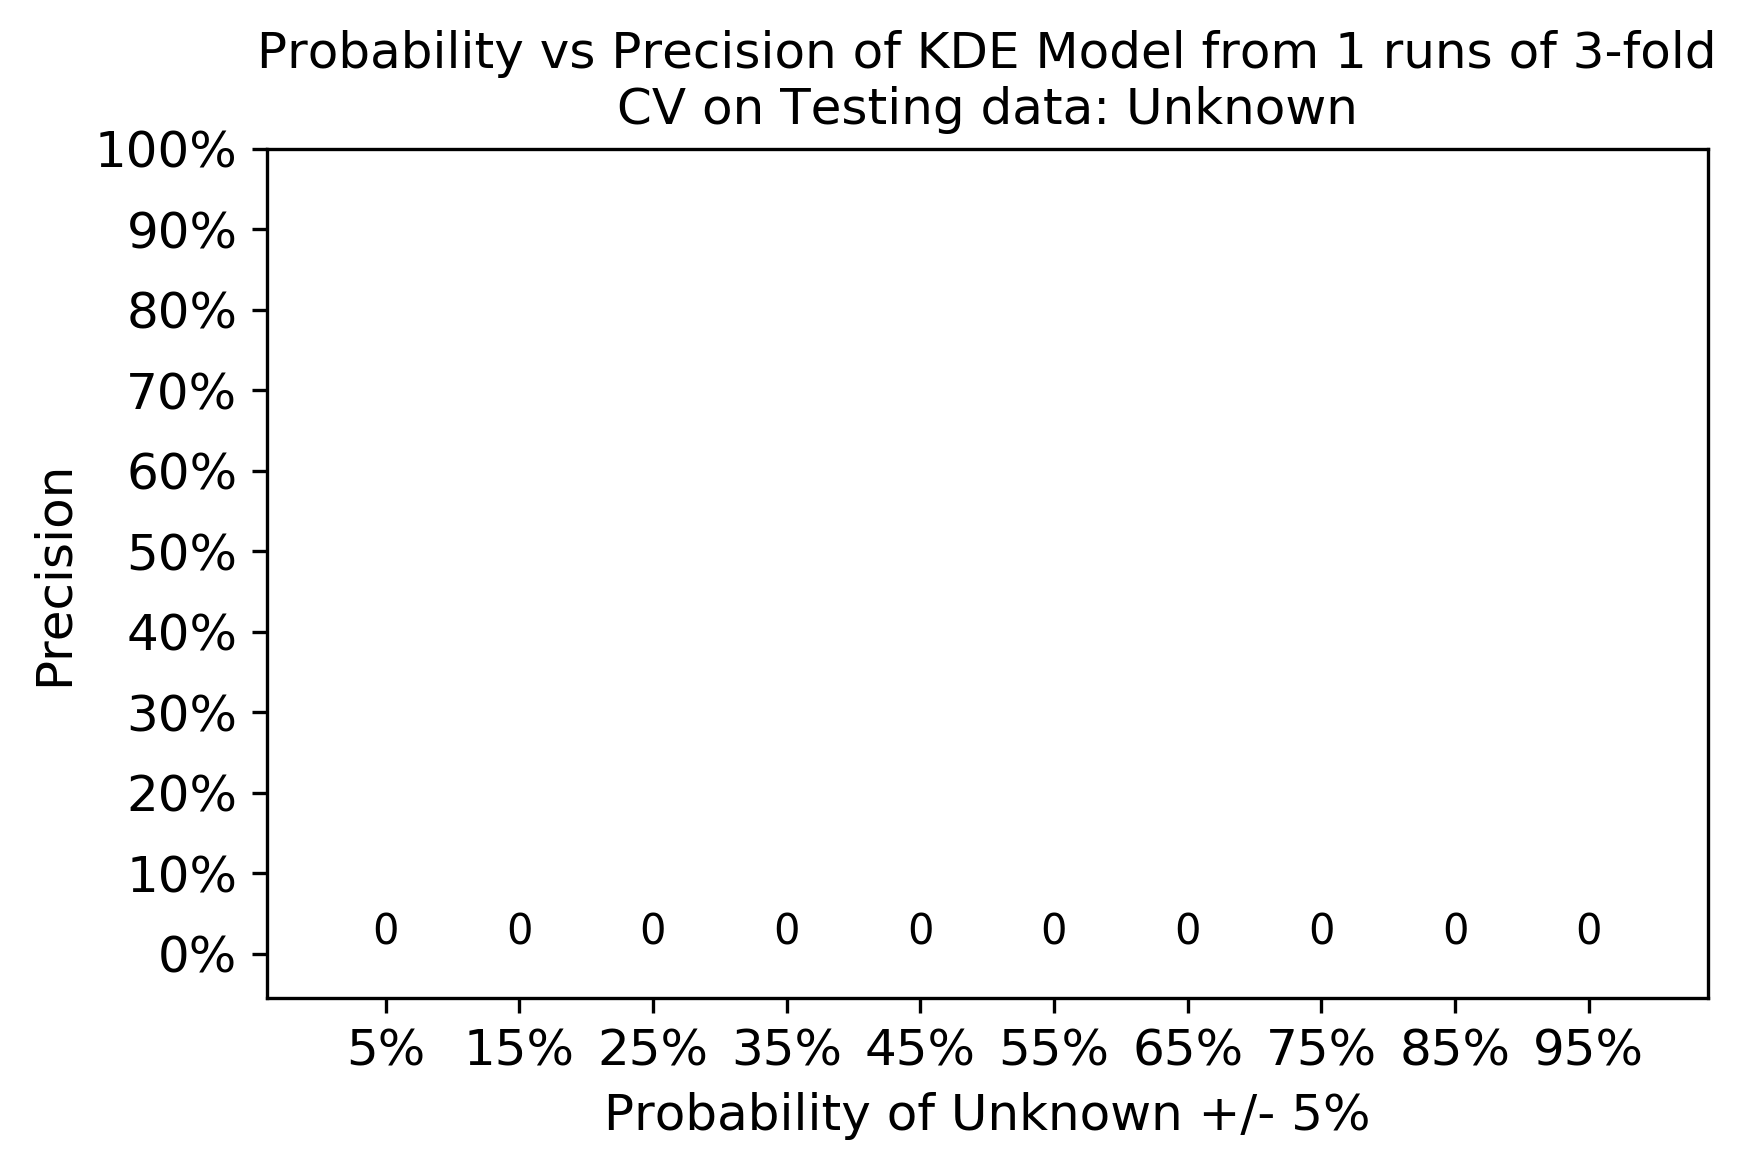

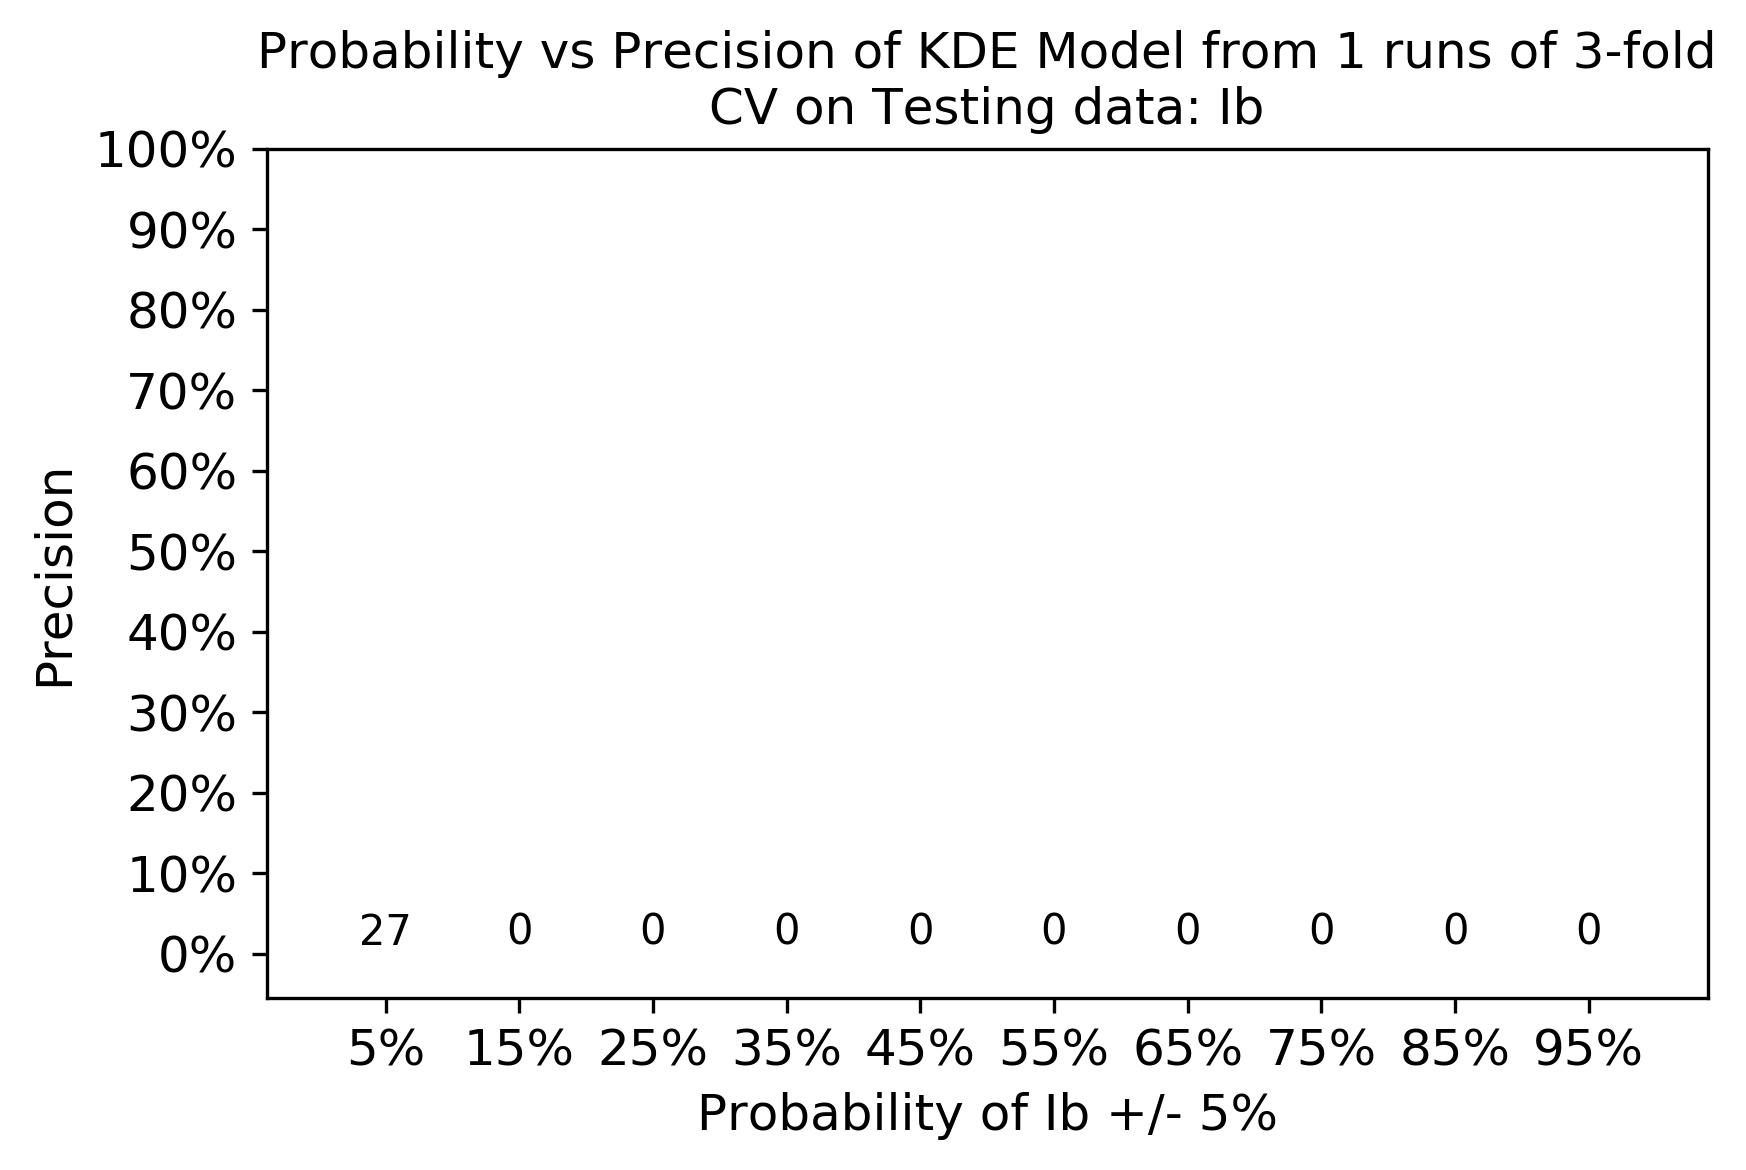

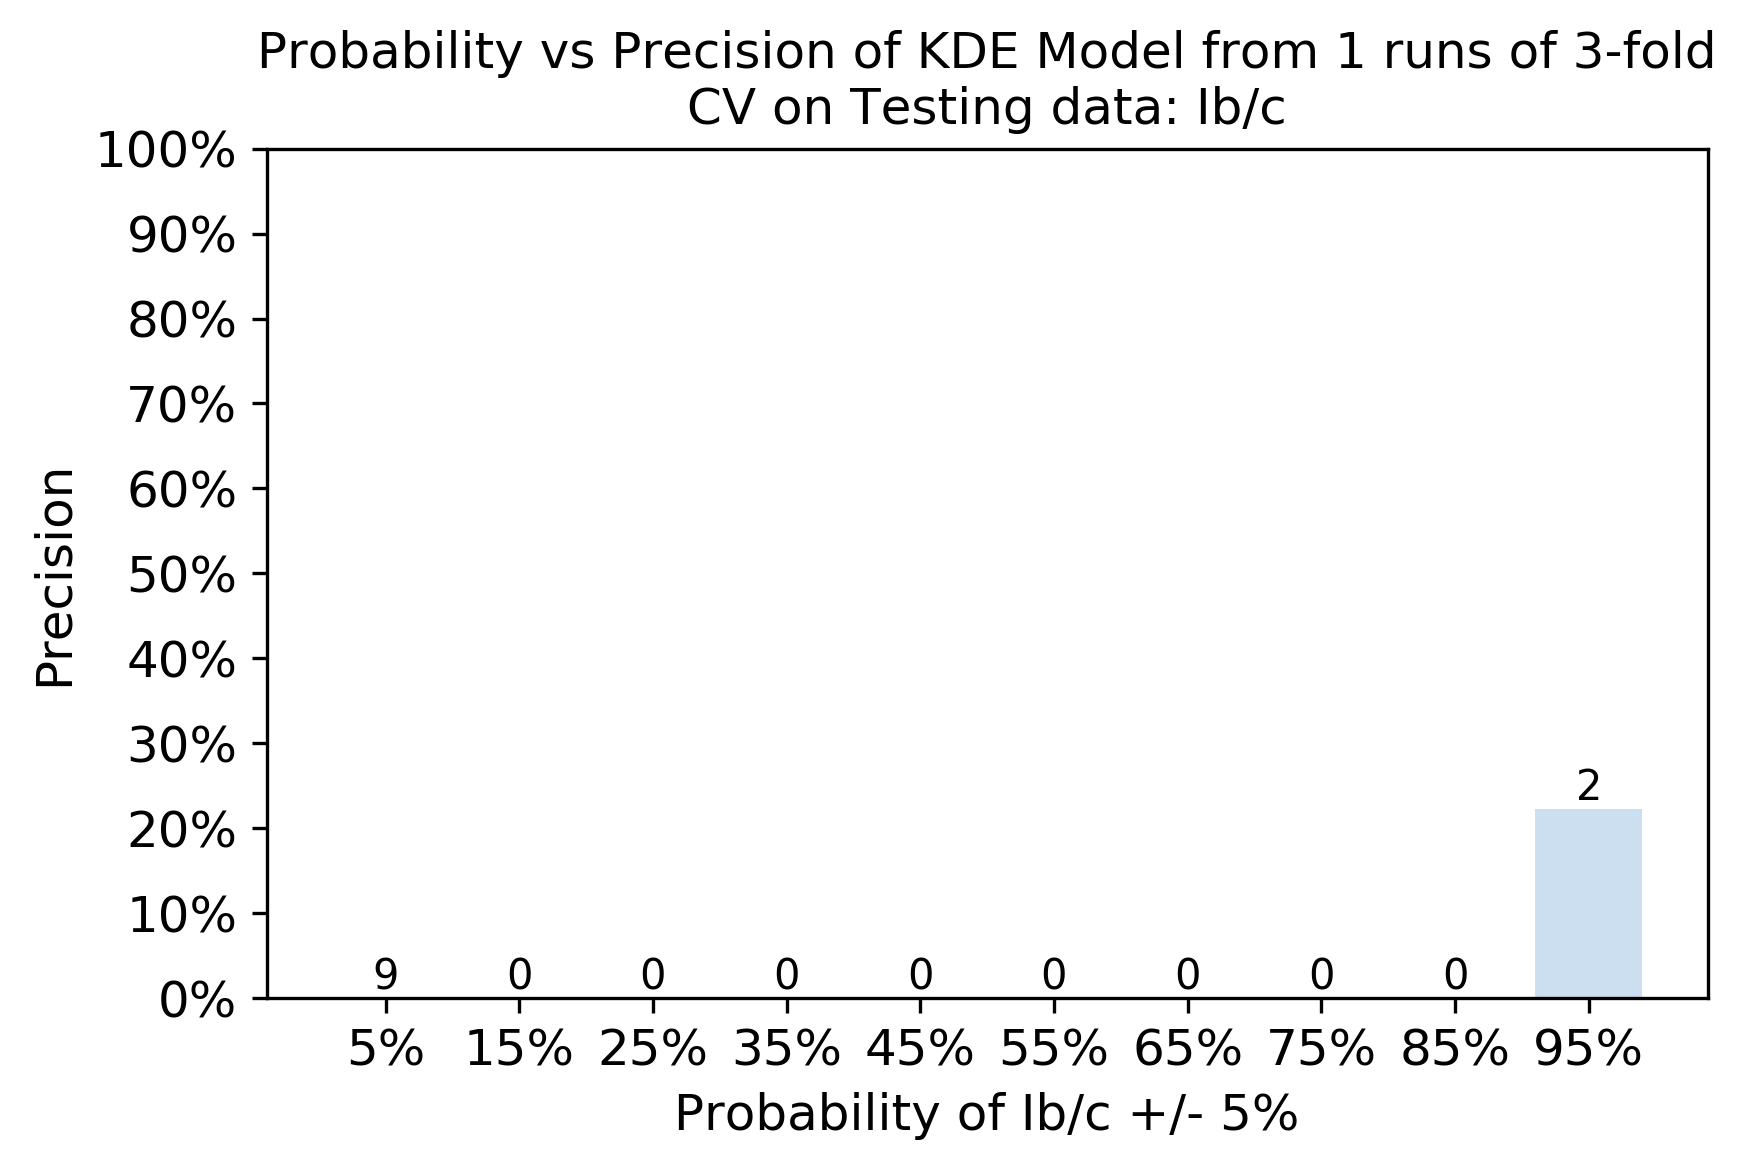

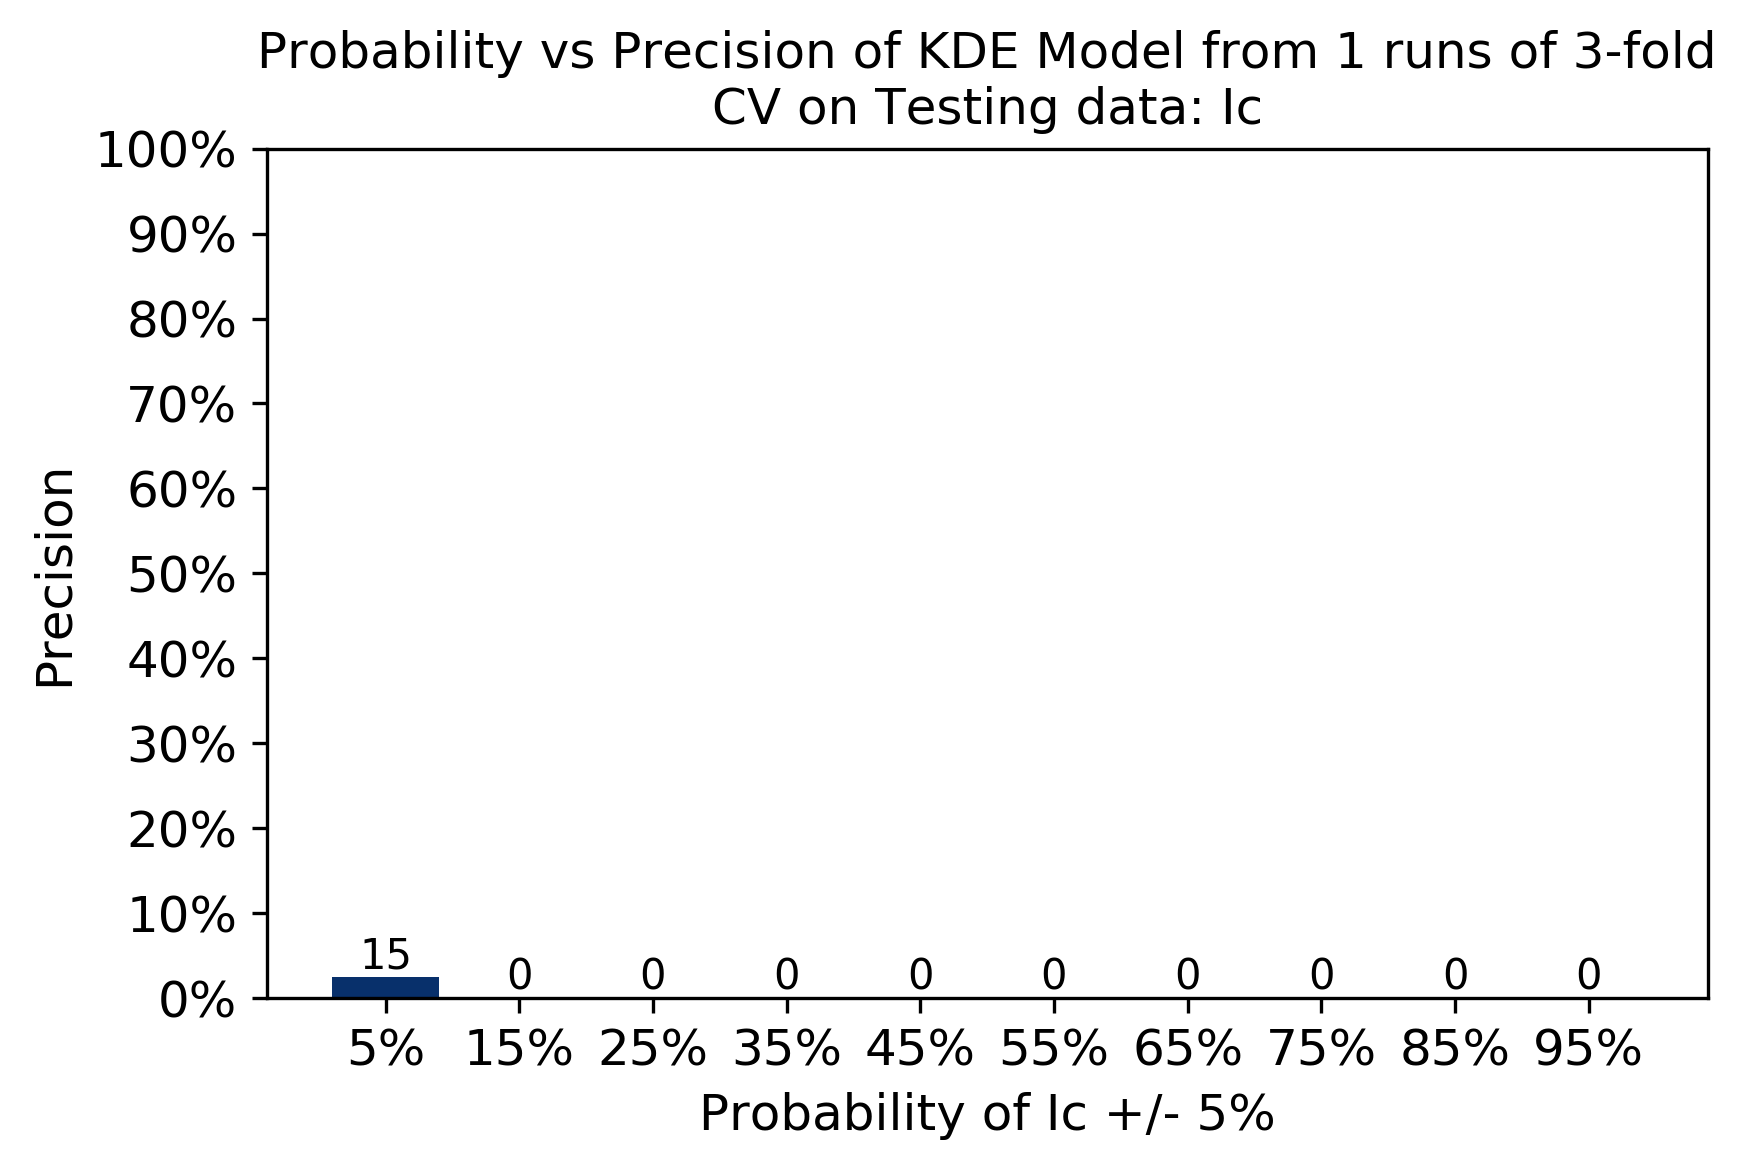

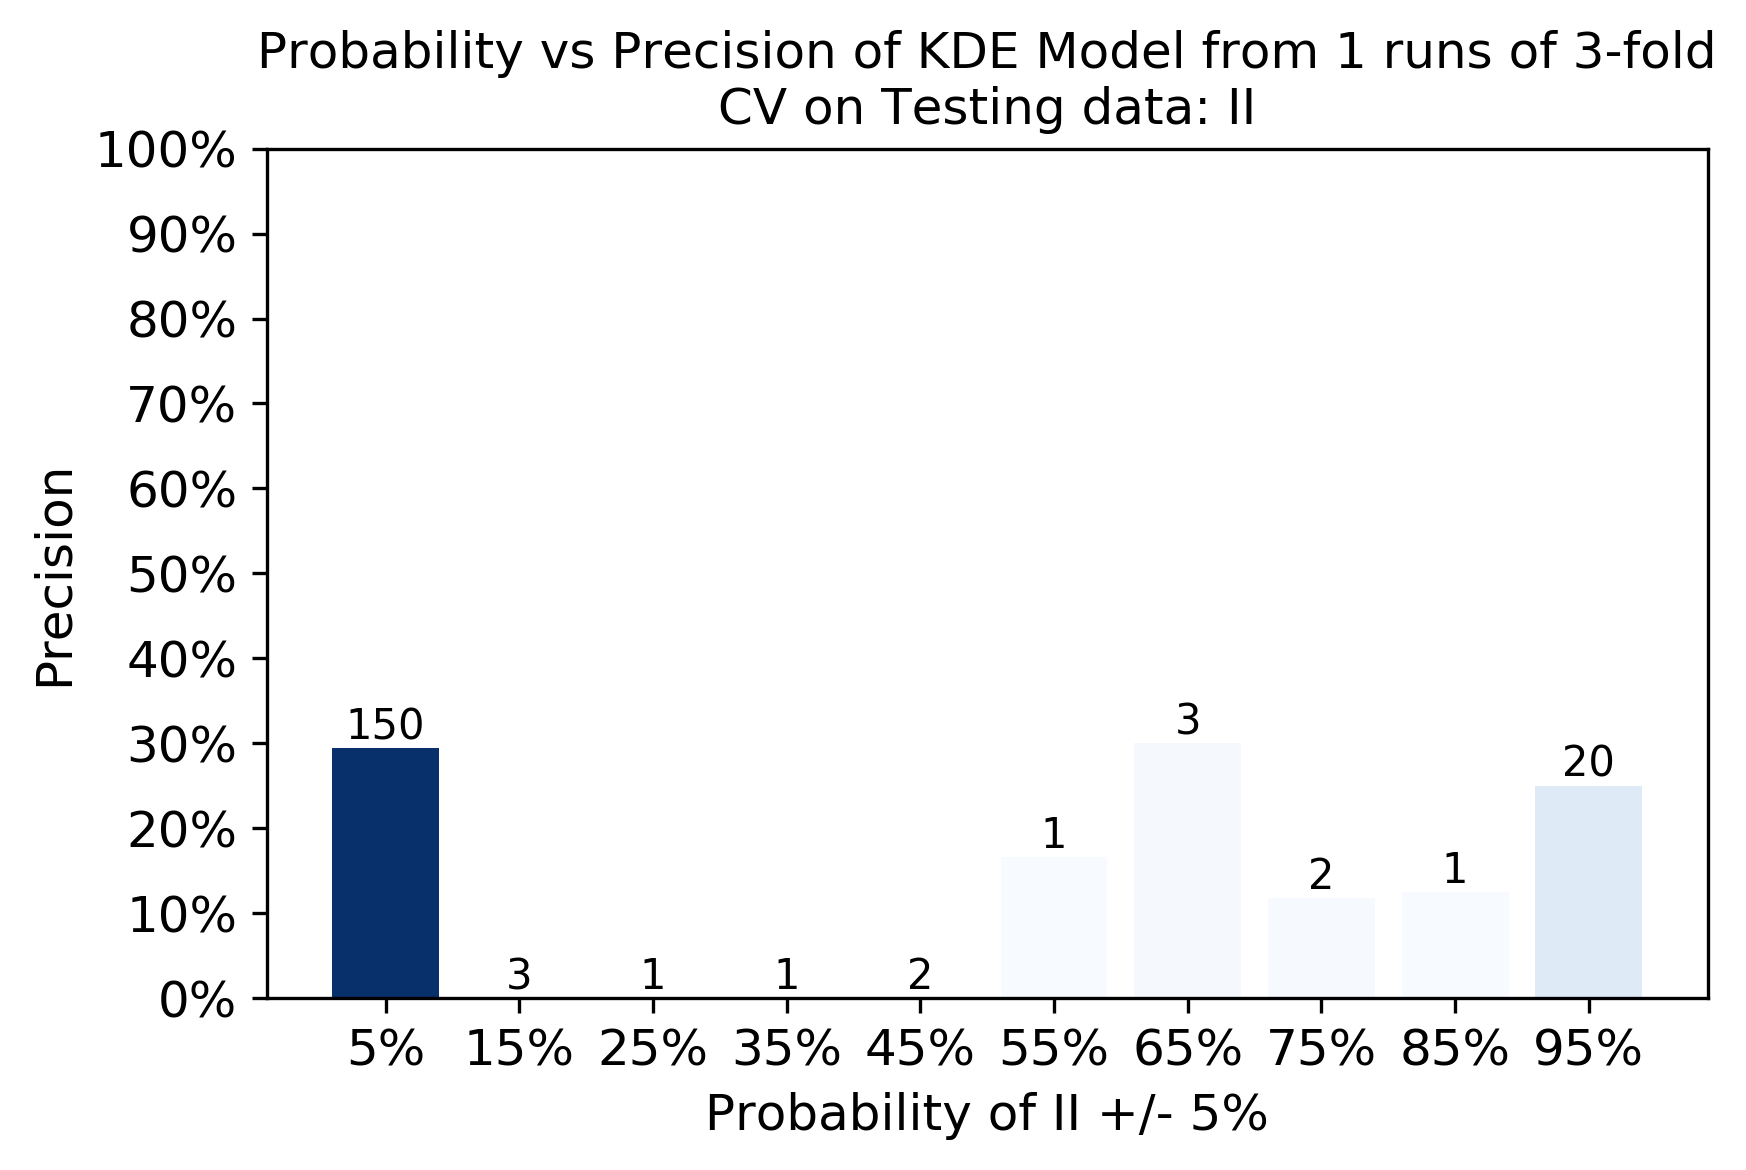

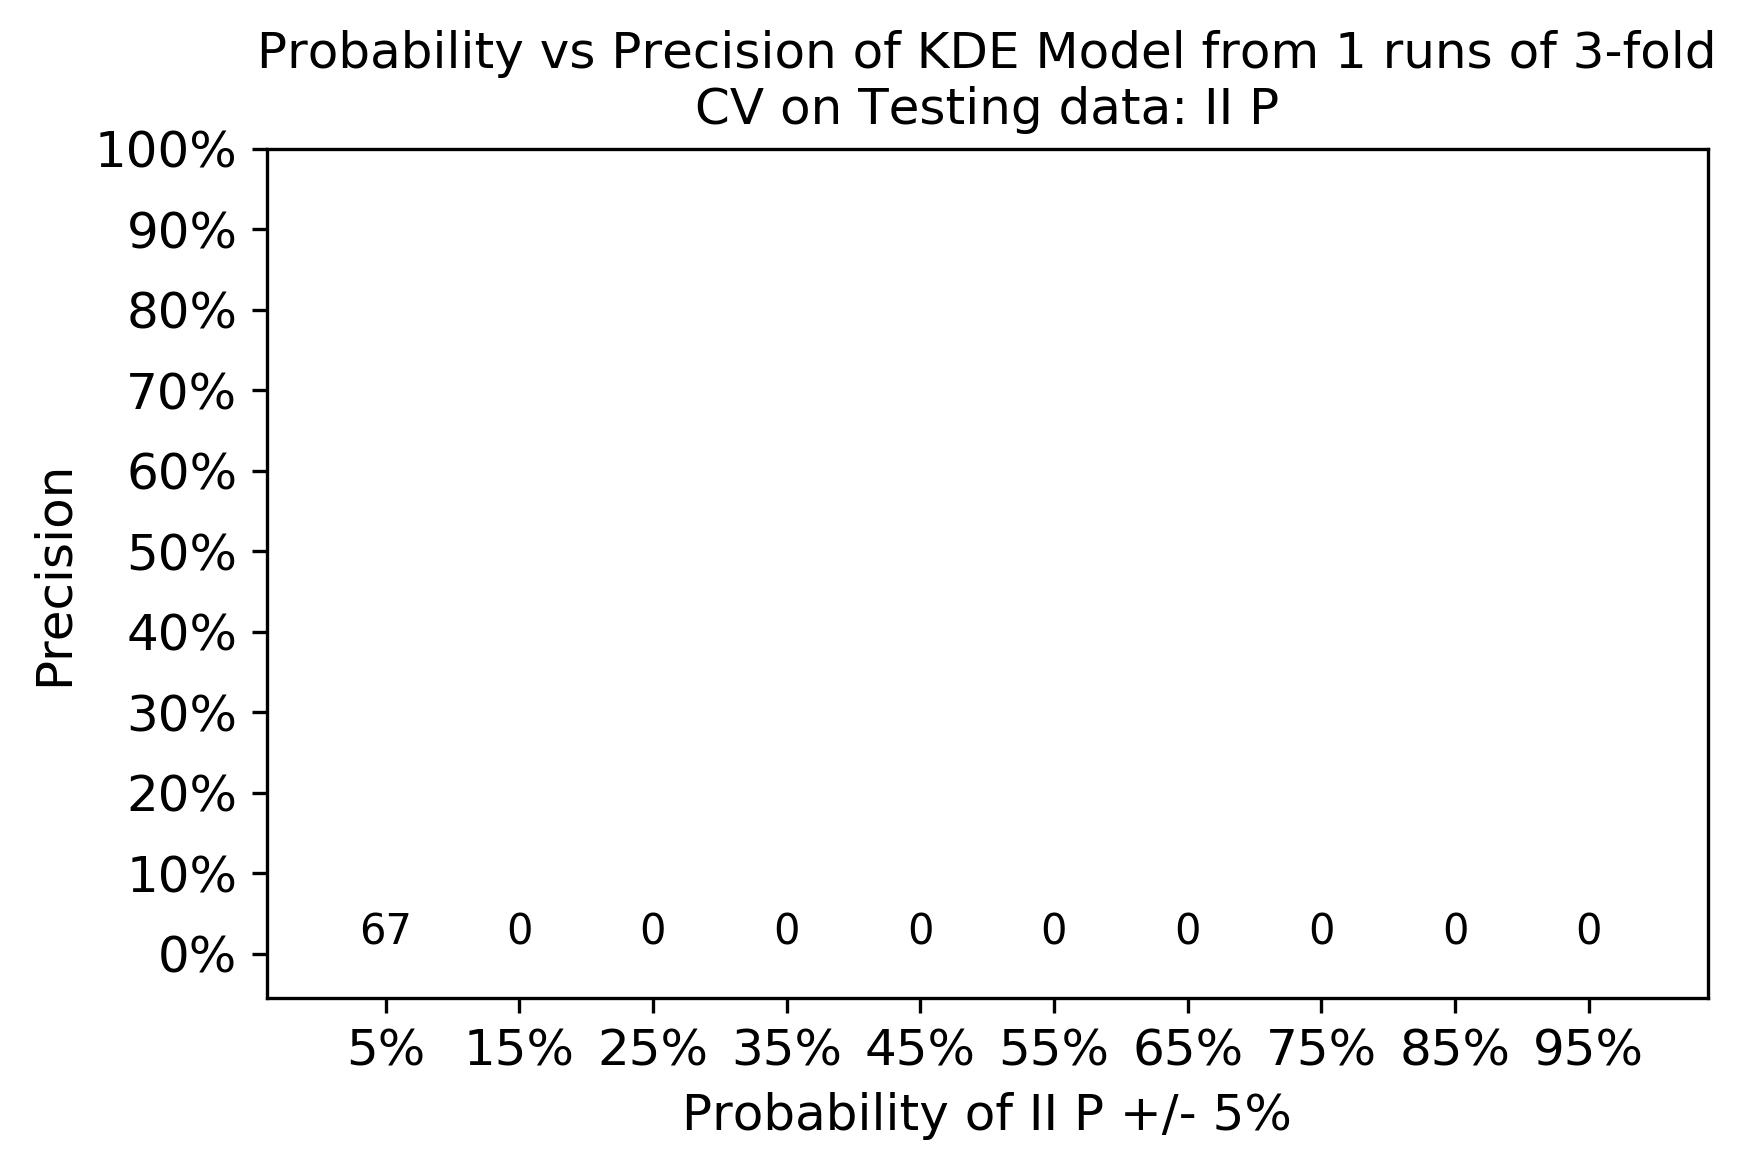

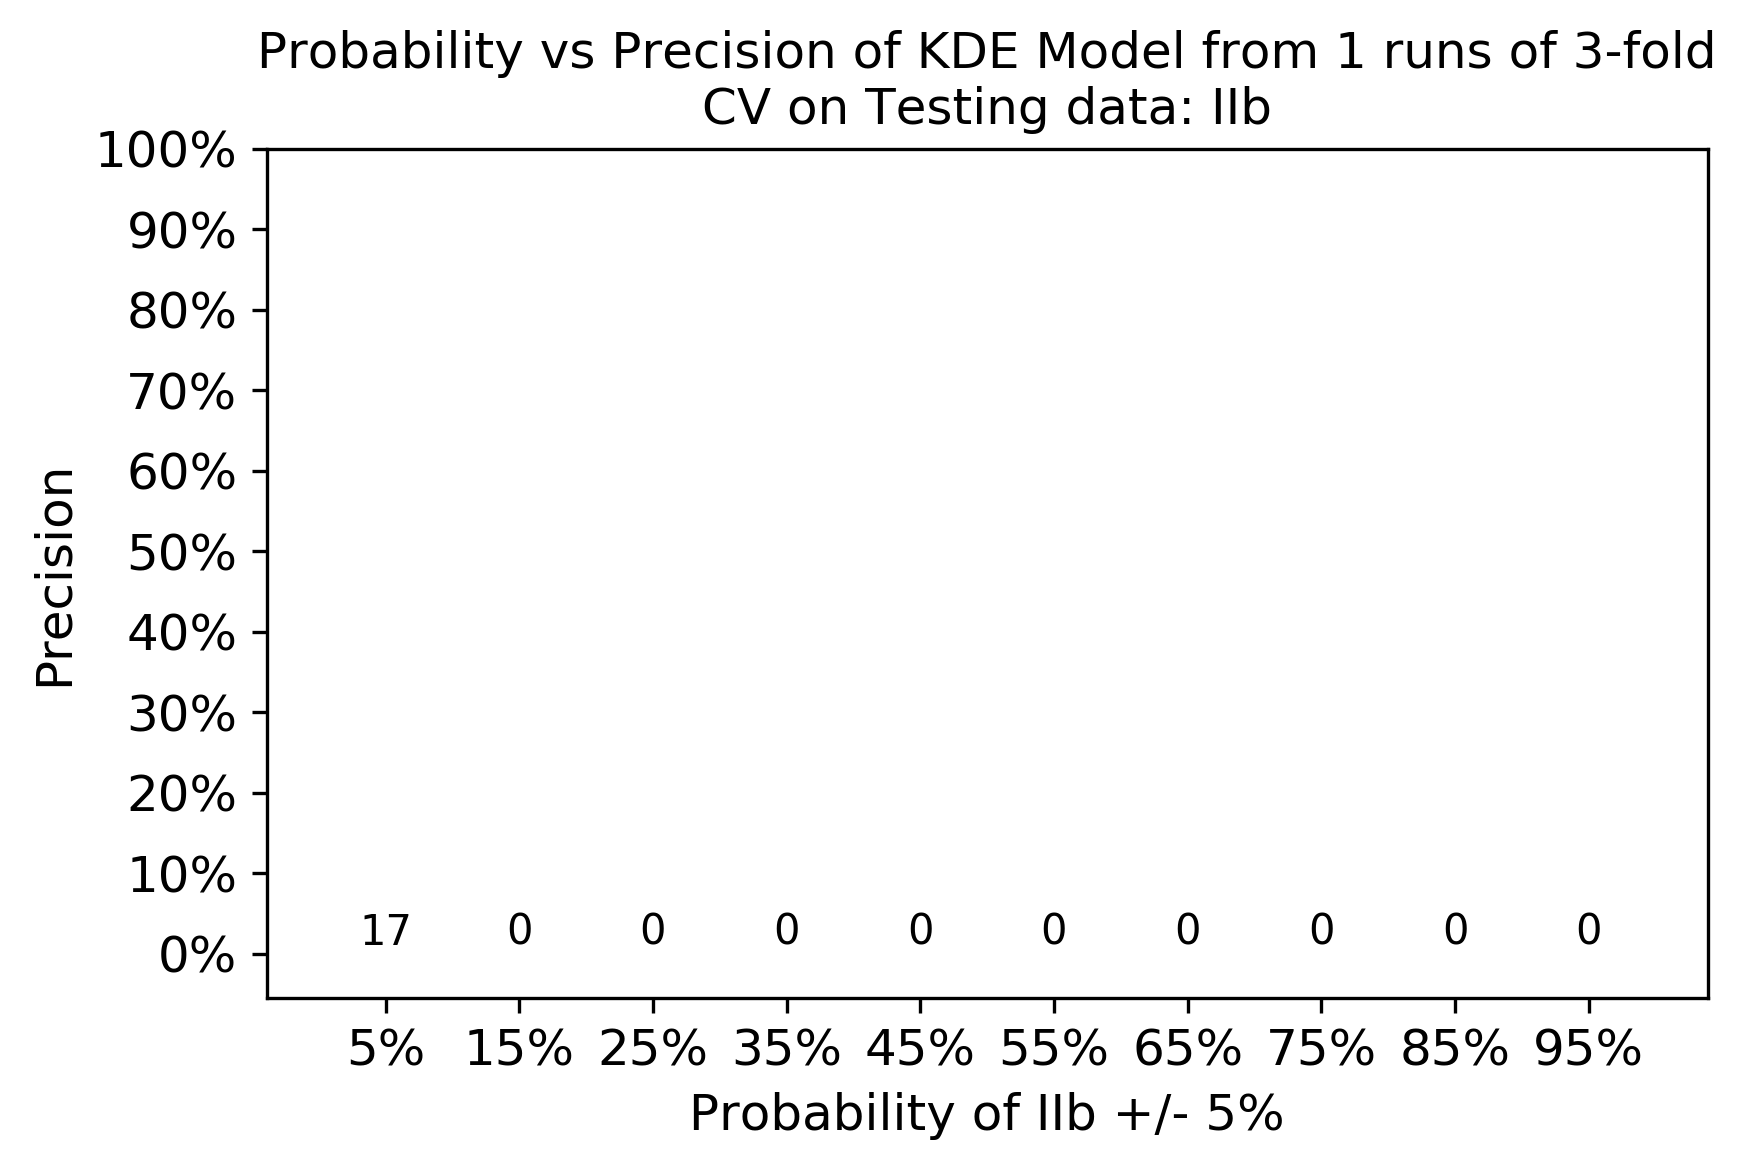

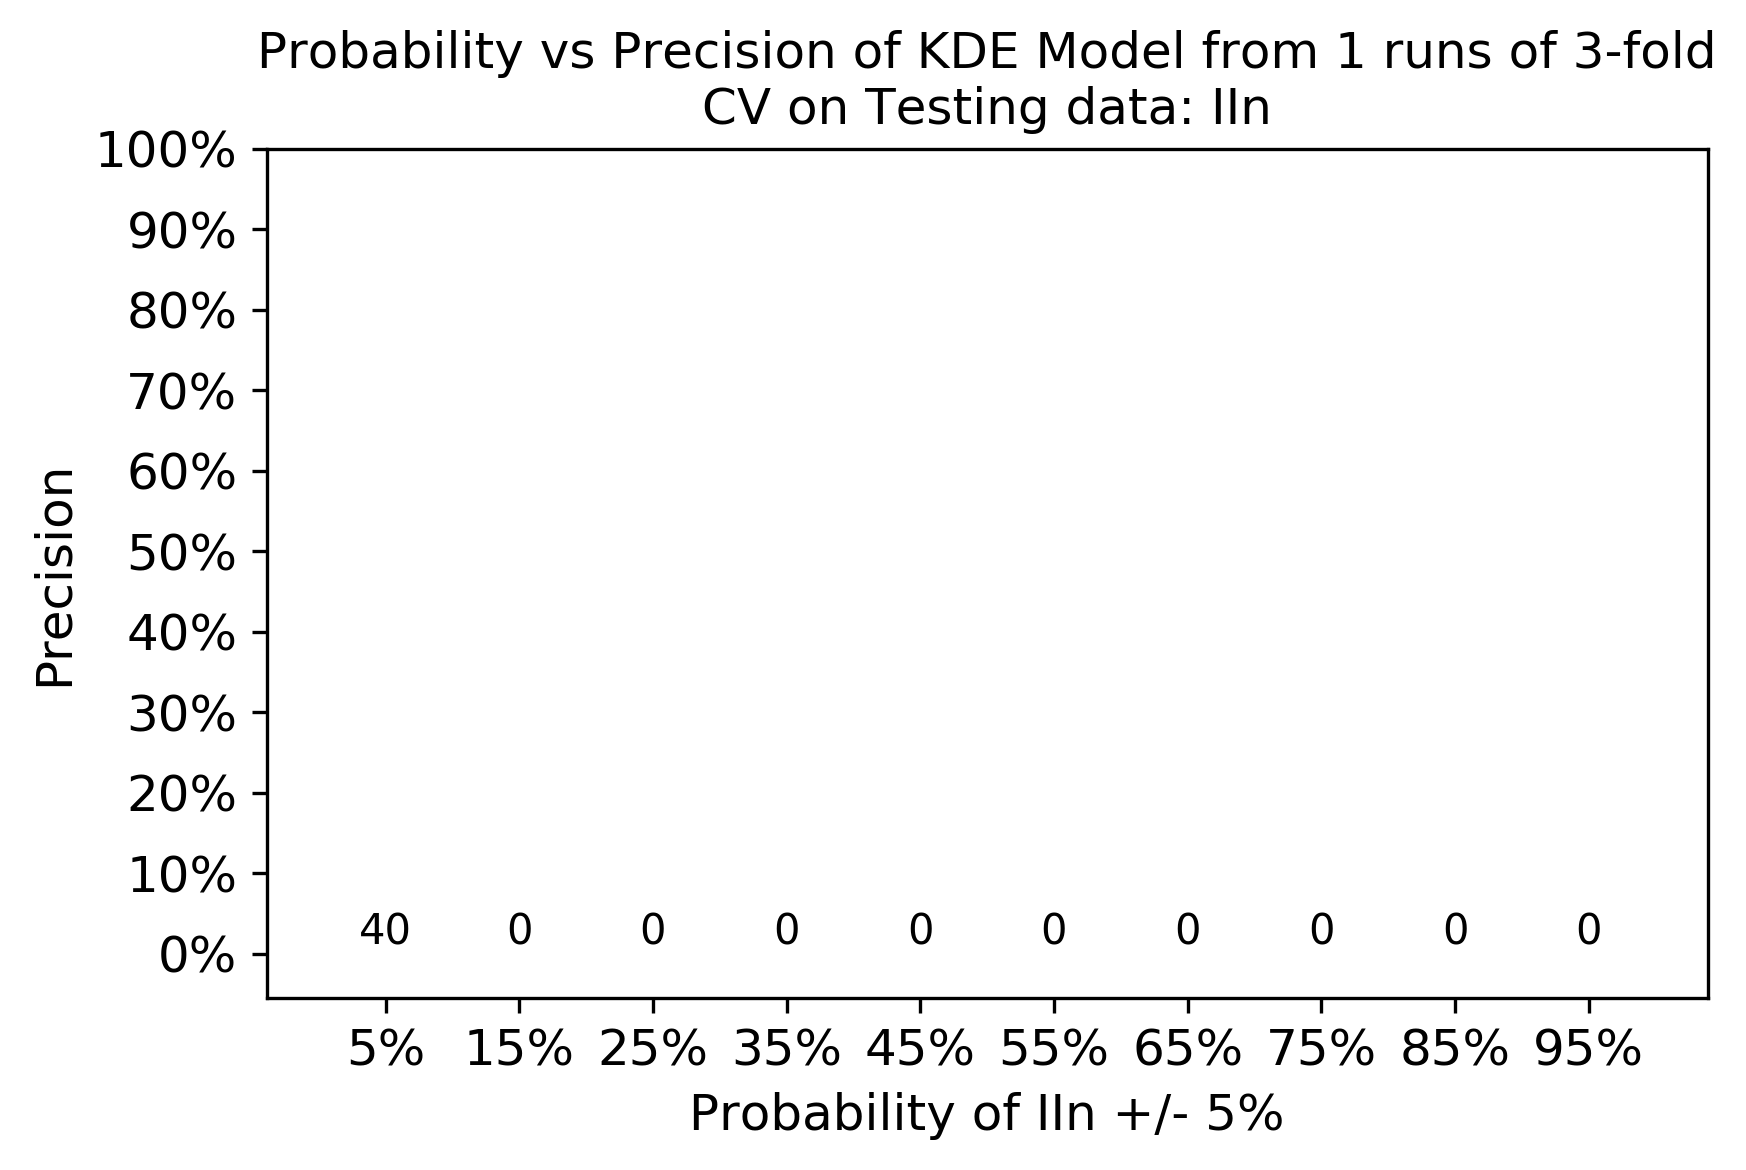

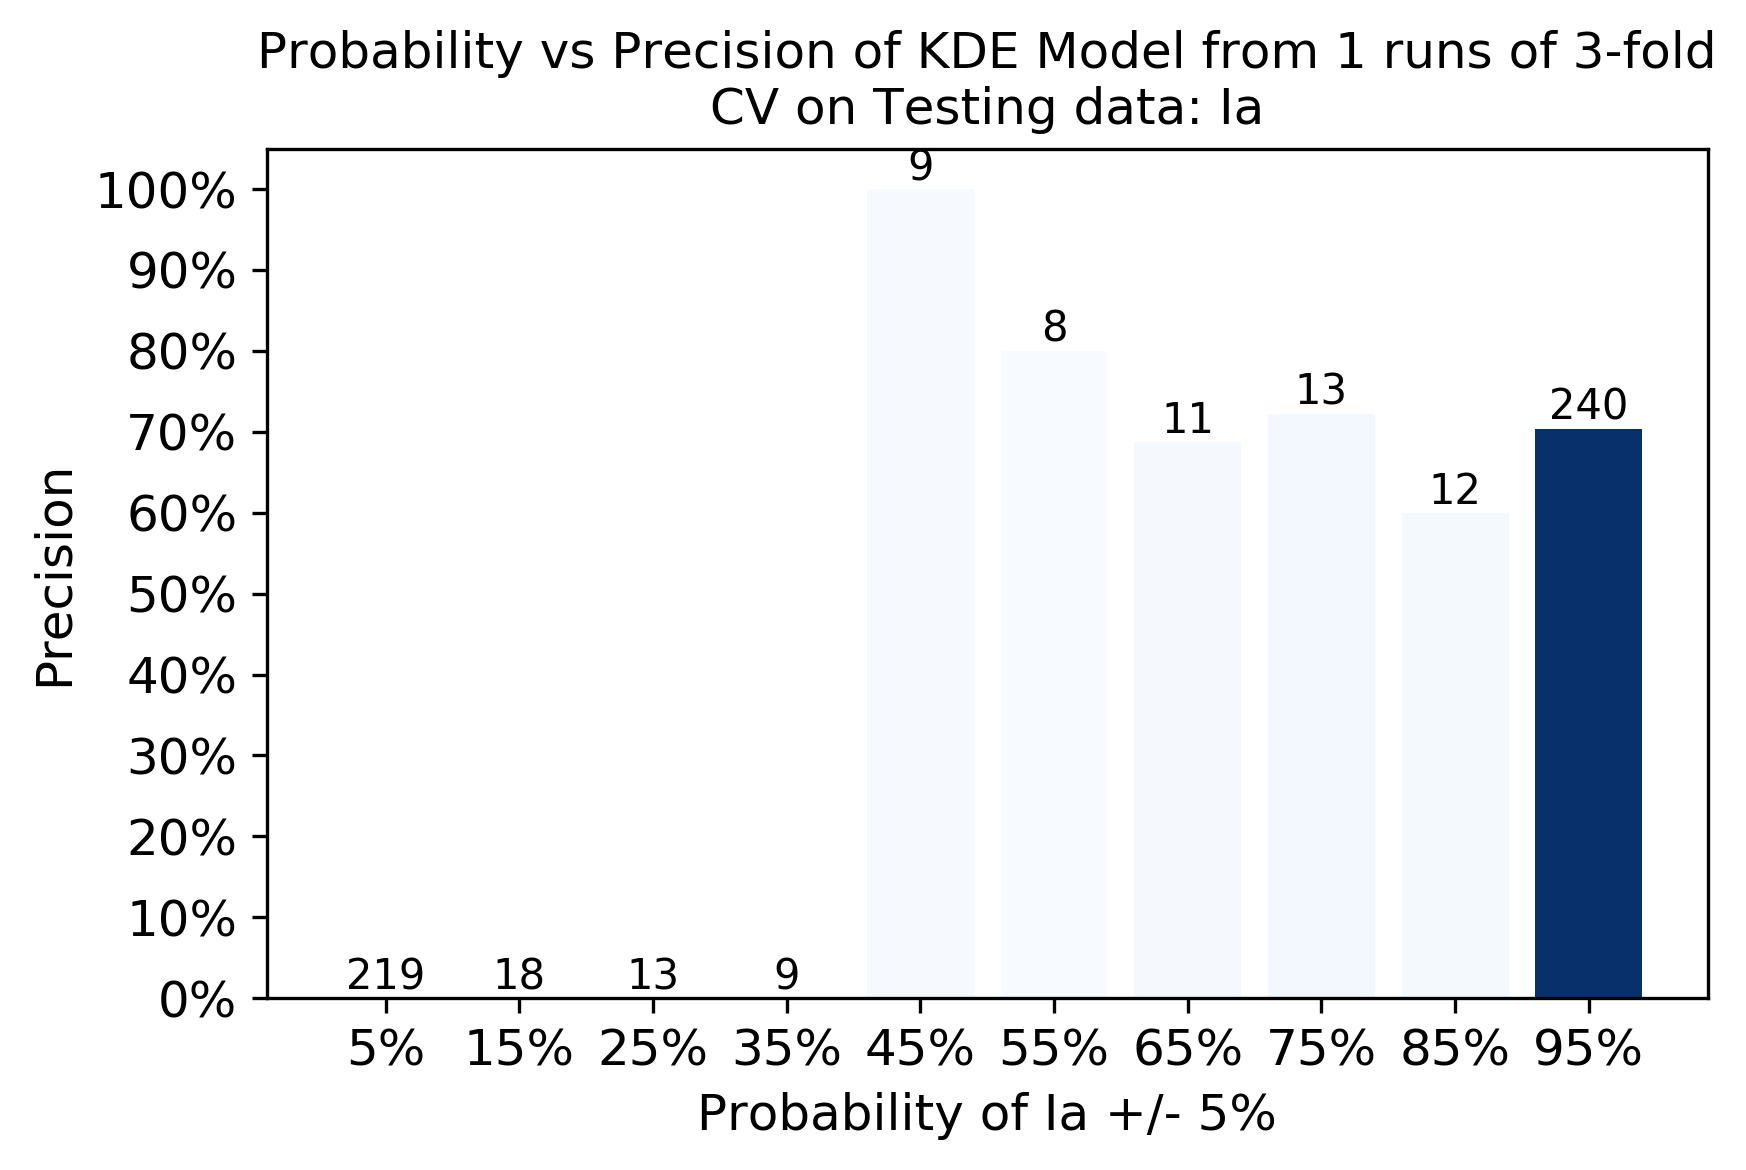

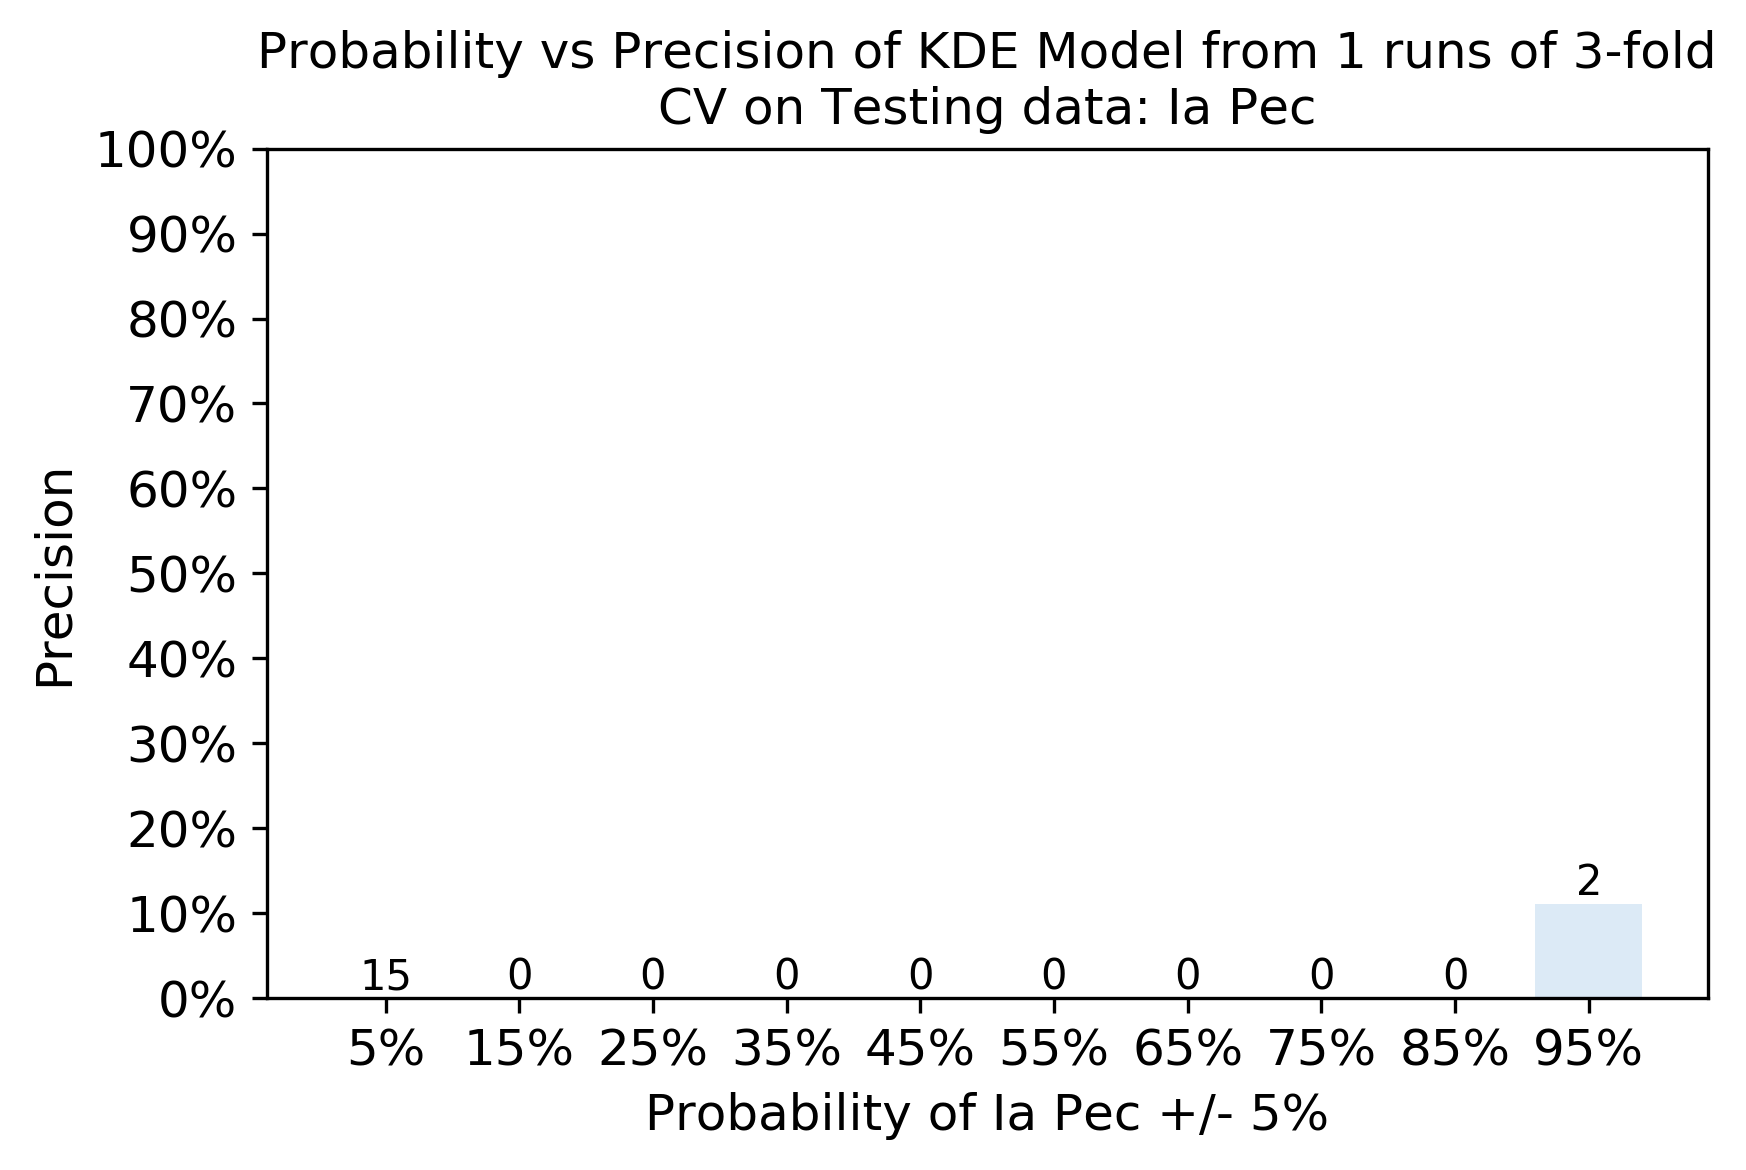

In [2]:
from models.kde_model.kde_model import KDEModel
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

kde = KDEModel(
         cols = cols,
        transform_features = True,
        folds = 3,
#          pca = 5,
         incl_redshift = True,
         num_runs = 1,
#          subsample = 200,
#          top_classes = 14,
         min_class_size = 6,
         naive = False, # False -> Multi-dimensional kernel
         )
kde.run_model()